# EDA 4. ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## **1. Подготовка и обработка данных**

### **1.1 Выполним загрузку необходимых библиотек**

In [1182]:
# Импорт библиотеки pandas для работы с данными в табличном виде
import pandas as pd
# Импорт библиотеки numpy для численных вычислений
import numpy as np
# Импорт модуля stats из библиотеки scipy для статистических тестов
from scipy import stats
# Импорт модуля pyplot из библиотеки matplotlib для построения графиков
import matplotlib.pyplot as plt
# Импорт библиотеки seaborn для улучшенного визуального оформления графиков
import seaborn as sns
# Команда для отображения графиков в Jupyter Notebook
%matplotlib inline
# Импорт функции shapiro для теста Шапиро-Уилка на нормальность распределения
from scipy.stats import shapiro
# Импорт функции kruskal для теста Краскела-Уоллиса
from scipy.stats import kruskal
# Импорт функции pearsonr для расчета корреляции Пирсона
from scipy.stats import pearsonr
# Импорт функции chi2_contingency для теста хи-квадрат
from scipy.stats import chi2_contingency
# Импорт класса OrdinalEncoder для кодирования категориальных переменных
from sklearn.preprocessing import OrdinalEncoder
# Импорт модуля api из библиотеки statsmodels для статистического моделирования
import statsmodels.api as sm
# Импорт функции pairwise_tukeyhsd для пост-хок анализа с использованием теста Тьюки
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Импорт функции variance_inflation_factor для расчета фактора инфляции дисперсии
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Импорт функции add_constant для добавления константы к модели
from statsmodels.tools.tools import add_constant
# Импорт функции proportions_ztest для z-теста пропорций
from statsmodels.stats.proportion import proportions_ztest
# Импортируем библиотеку Pingouin для статистического анализа данных
import pingouin as pg
# Импортируем библиотеку scikit-posthocs для выполнения пост-хок тестов
import scikit_posthocs as sp


### **1.2 Выполним загрузку датафрейма**

In [1183]:
# Загрузка данных из CSV-файла в DataFrame с использованием pandas, 
# установка первого столбца в качестве индекса
df = pd.read_csv('C:/IDE2/SF_DS/hw_eda/ds_salaries.csv', index_col=[0])

# Отображение первых пяти строк DataFrame для предварительного просмотра данных
display(df.head(5))

# Отображение последних пяти строк DataFrame для проверки конца набора данных
display(df.tail(5))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


### **1.3 Выведим сводную информацию о датафрейме и выполним проверку на дубликаты**

In [1184]:
# Вызов метода info для получения сводной информации о DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [1185]:
# Проверка на дубликаты
duplicates = df.duplicated().sum()
print(f"Количество дубликатов в данных: {duplicates}")

# Если есть дубликаты, удаляем их
if duplicates > 0:
    df = df.drop_duplicates()
    print("Дубликаты удалены.")

# Проверка размерности датафрейма
print(f"Размерность датафрейма после удаления дубликатов: {df.shape}")

Количество дубликатов в данных: 42
Дубликаты удалены.
Размерность датафрейма после удаления дубликатов: (565, 11)


### **1.4 Выполним отчистку данных**

Столбцы salary и salary_currency могут быть неинформативными, так как мы будем использовать salary_in_usd для анализа, в связи с тем, что он уже представляет зарплату в единой валюте. 

In [1186]:
# Удаление неинформативных столбцов
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)

# Проверка размерности датафрейма после удаления
print(df.shape)


(565, 9)


In [1187]:
# Вызов метода describe для получения описательной статистики DataFrame
df.describe(include='all' )

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,150000.000000,NaN,100.000000,NaN,NaN


### **1.5 Произведем классификацию признаков на числовые и категориальные (дискретные)**

In [1188]:
# Вызов метода nunique для подсчета количества уникальных значений в каждом столбце DataFrame
unique_values = df.nunique()

# Вывод полученных уникальных значений на экран
print(unique_values)

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64


Числовые признаки:

- work_year: Год, в котором была выплачена зарплата (годы следуют друг за другом в упорядоченной последовательности без пропусков, и мы можем рассматривать их как часть непрерывного временного интервала).
- salary_in_usd: Зарплата в долларах США (этот признак непрерывен, так как зарплата может быть любым числом в определенном диапазоне и не ограничивается набором фиксированных уровней или категорий).

Категориальные (дискретные) признаки:
- remote_ratio: Общий объём работы, выполняемой удалённо (дискретный, так как принимает ограниченное количество значений: 0, 50, 100).
- experience_level: Опыт работы на этой должности в течение года (EN, MI, SE, EX).
- employment_type: Тип трудоустройства для этой роли (PT, FT, CT, FL).
- job_title: Роль, в которой соискатель работал в течение года.
- employee_residence: Основная страна проживания сотрудника в течение рабочего года.
- company_location: Страна главного офиса работодателя или филиала по контракту.
- company_size: Среднее количество людей, работавших в компании в течение года (S, M, L).  

- Признаки, такие как job_title, employee_residence и company_location, также являются категориальными, но могут содержать большое количество уникальных значений, что может потребовать специальных методов кодирования при подготовке данных для моделирования.

## **2. Визуальный анализ данных**

Для удобства и повышения точности анализа визуализированной информации перед некоторыми графиками производится расчет основных статистических показателей для выбранного признака

### **2.1 Анализ признака salary_in_usd (запралата в долларах США)**

In [1189]:
# Расчет наиболее часто встречающегося значения зарплаты в долларах США
salary_mode = df['salary_in_usd'].mode()[0]
# Расчет минимальной зарплаты в долларах США
salary_min = df['salary_in_usd'].min()
# Расчет максимальной зарплаты в долларах США
salary_max = df['salary_in_usd'].max()
# Расчет средней зарплаты в долларах США
salary_mean = df['salary_in_usd'].mean()
# Расчет стандартного отклонения зарплаты в долларах США
salary_std = df['salary_in_usd'].std()
# Расчет квартилей зарплаты в долларах США
salary_quantiles = df['salary_in_usd'].quantile([0.25, 0.5, 0.75]).to_list()
# Расчет p-значения для теста на нормальность распределения зарплаты в долларах США
salary_normaltest_pvalue = stats.normaltest(df['salary_in_usd']).pvalue
# Расчет медианного абсолютного отклонения зарплаты в долларах США
mad_salary = (df['salary_in_usd'] - df['salary_in_usd'].median()).abs().median()
# Расчет коэффициента асимметрии распределения зарплаты в долларах США
skewness_salary = df['salary_in_usd'].skew()
# Расчет коэффициента эксцесса распределения зарплаты в долларах США
kurtosis_salary = df['salary_in_usd'].kurtosis()

# Вывод общей статистики по зарплатам в долларах США
print(f"Статистика (общая):")
print(f"Мода зарплаты: {salary_mode} USD")
print(f"Минимальная зарплата: {salary_min} USD")
print(f"Максимальная зарплата: {salary_max} USD")
print(f"Средняя зарплата: {salary_mean} USD")
print(f"Стандартное отклонение: {salary_std} USD")
print(f"Квантили: {salary_quantiles}")
print(f"P-значение теста на нормальность: {salary_normaltest_pvalue}")
print(f"Медианное абсолютное отклонение (МАО): {mad_salary} USD")
print(f"Коэффициент асимметрии: {skewness_salary}")
print(f"Коэффициент эксцесса: {kurtosis_salary}\n")

# Получение списка уникальных значений года работы
years = df['work_year'].unique()

# Инициализация словаря для хранения статистических данных по годам
salary_stats_by_year = {}

# Расчет статистических показателей для зарплаты в долларах США по каждому году
# Цикл для расчета статистических показателей зарплаты по каждому году работы
for year in years:
    # Фильтрация данных по текущему году
    data_by_year = df[df['work_year'] == year]['salary_in_usd']
    # Создание словаря для хранения статистических данных по текущему году
    salary_stats_by_year[year] = {
        'mode': data_by_year.mode()[0],
        'min': data_by_year.min(),
        'max': data_by_year.max(),
        'mean': data_by_year.mean(),
        'std': data_by_year.std(),
        'quantiles': data_by_year.quantile([0.25, 0.5, 0.75]).to_list(),
        'normaltest_pvalue': stats.normaltest(data_by_year).pvalue,
        'mad': (data_by_year - data_by_year.median()).abs().median(),
        'skewness': data_by_year.skew(),
        'kurtosis': data_by_year.kurtosis()
    }

# Вывод статистических данных по зарплатам в долларах США для каждого года
# Цикл для итерации по словарю salary_stats_by_year, где 'year' - ключ (год), а 'stats' - значение (статистика зарплаты)
for year, stats in salary_stats_by_year.items():
    print(f"Статистика за {year} год:")
    print(f"Мода зарплаты: {stats['mode']} USD")
    print(f"Минимальная зарплата: {stats['min']} USD")
    print(f"Максимальная зарплата: {stats['max']} USD")
    print(f"Средняя зарплата: {stats['mean']} USD")
    print(f"Стандартное отклонение: {stats['std']} USD")
    print(f"Квантили: {stats['quantiles']}")
    print(f"P-значение теста на нормальность: {stats['normaltest_pvalue']}")
    print(f"Медианное абсолютное отклонение (МАО): {stats['mad']} USD")
    print(f"Коэффициент асимметрии: {stats['skewness']}")
    print(f"Коэффициент эксцесса: {stats['kurtosis']}\n")


Статистика (общая):
Мода зарплаты: 100000 USD
Минимальная зарплата: 2859 USD
Максимальная зарплата: 600000 USD
Средняя зарплата: 110610.34336283186 USD
Стандартное отклонение: 72280.70279190093 USD
Квантили: [60757.0, 100000.0, 150000.0]
P-значение теста на нормальность: 1.3597635366967697e-50
Медианное абсолютное отклонение (МАО): 43262.0 USD
Коэффициент асимметрии: 1.7328374573354977
Коэффициент эксцесса: 6.451699997093703

Статистика за 2020 год:
Мода зарплаты: 6072 USD
Минимальная зарплата: 5707 USD
Максимальная зарплата: 450000 USD
Средняя зарплата: 95813.0 USD
Стандартное отклонение: 82831.79922224536 USD
Квантили: [45724.5, 75544.0, 115526.0]
P-значение теста на нормальность: 6.631958645434345e-12
Медианное абсолютное отклонение (МАО): 33699.5 USD
Коэффициент асимметрии: 2.3337964298653326
Коэффициент эксцесса: 6.8324137664465985

Статистика за 2021 год:
Мода зарплаты: 100000 USD
Минимальная зарплата: 2859 USD
Максимальная зарплата: 600000 USD
Средняя зарплата: 99430.41395348837

**Выводы:**

**Мода зарплаты:** 100 000 USD указывает на наиболее часто встречающуюся зарплату в датасете.  
**Минимальная зарплата:** 2 859 USD может отражать начальные позиции или стажировки.  
**Максимальная зарплата:** 600 000 USD свидетельствует о высокооплачиваемых ролях или исключительных случаях.  
**Средняя зарплата:** 110 610 USD является средним уровнем оплаты в отрасли.  
**Стандартное отклонение:** 72 280 USD говорит о значительном разбросе зарплат.  
**Квантили:** Показывают распределение зарплат по квартелям, что помогает понять общую структуру оплаты труда.  
**P-значение теста на нормальность:** Близко к нулю, что указывает на то, что распределение зарплат не является нормальным.  
**Медианное абсолютное отклонение (МАО):** 43 262 USD показывает медианное отклонение от медианы зарплат.  
**Коэффициент асимметрии:** 1.73 говорит о правосторонней асимметрии распределения.  
**Коэффициент эксцесса:** 6.45 указывает на более острый пик распределения по сравнению с нормальным.  

**2020 год:**  
**Мода зарплаты:** 6 072 USD.  
**Средняя зарплата:** 95 813 USD.  
Высокий коэффициент эксцесса и асимметрии, что может указывать на изменения в рынке труда из-за пандемии COVID-19.  

**2021 год:**  
**Мода зарплаты:** 100 000 USD.  
**Средняя зарплата:** 99 430 USD.  
Продолжение тренда на увеличение разброса зарплат.  

**2022 год:**  
**Мода зарплаты:** 120 000 USD.  
**Средняя зарплата:** 123 089 USD.  
Уменьшение коэффициента асимметрии и эксцесса, что может свидетельствовать о стабилизации рынка.  

**Причины и гипотезы:**  
- Влияние глобальных событий на рынок труда.  
- Рост индустрии данных и увеличение инвестиций в технологии.  
- Наблюдается увеличение моды и средней зарплаты с течением времени, что может быть связано с ростом спроса на специалистов в области данных.  
- Высокие значения коэффициента асимметрии и эксцесса в 2020 и 2021 годах могут быть результатом внешних факторов, таких как пандемия.  

**Предложения:**  
Компаниям следует учитывать текущие тенденции рынка при формировании стратегии вознаграждения.  
Специалистам стоит ориентироваться на рыночные тренды при переговорах о зарплате.  

Рынок труда в области данных демонстрирует положительную динамику с увеличением средней и модальной зарплаты. Однако значительный разброс зарплат и асимметрия распределения требуют внимательного анализа при принятии решений, связанных с карьерой.  

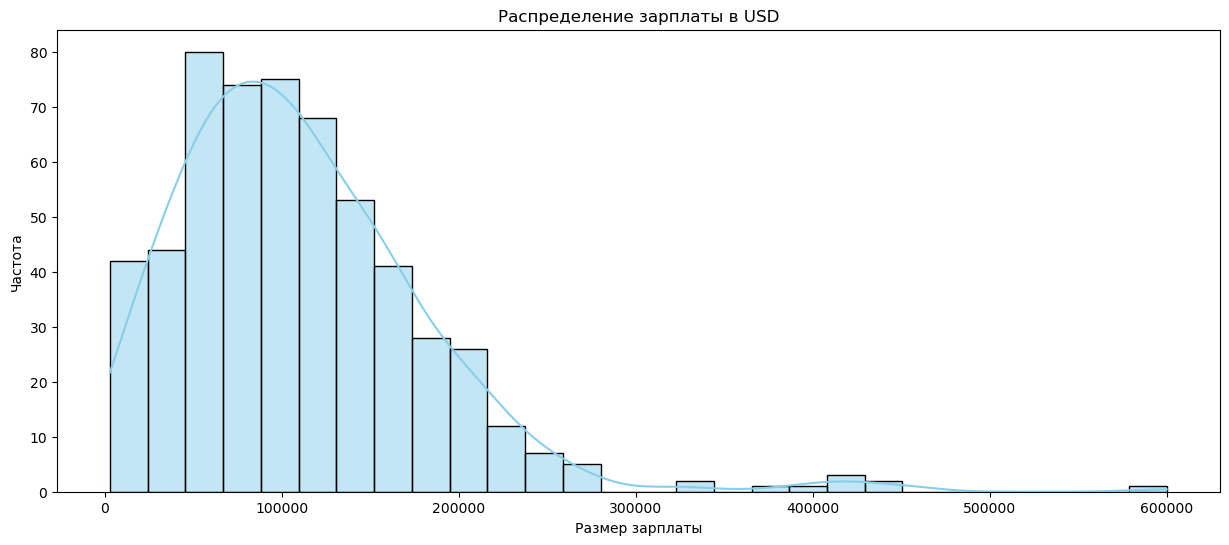

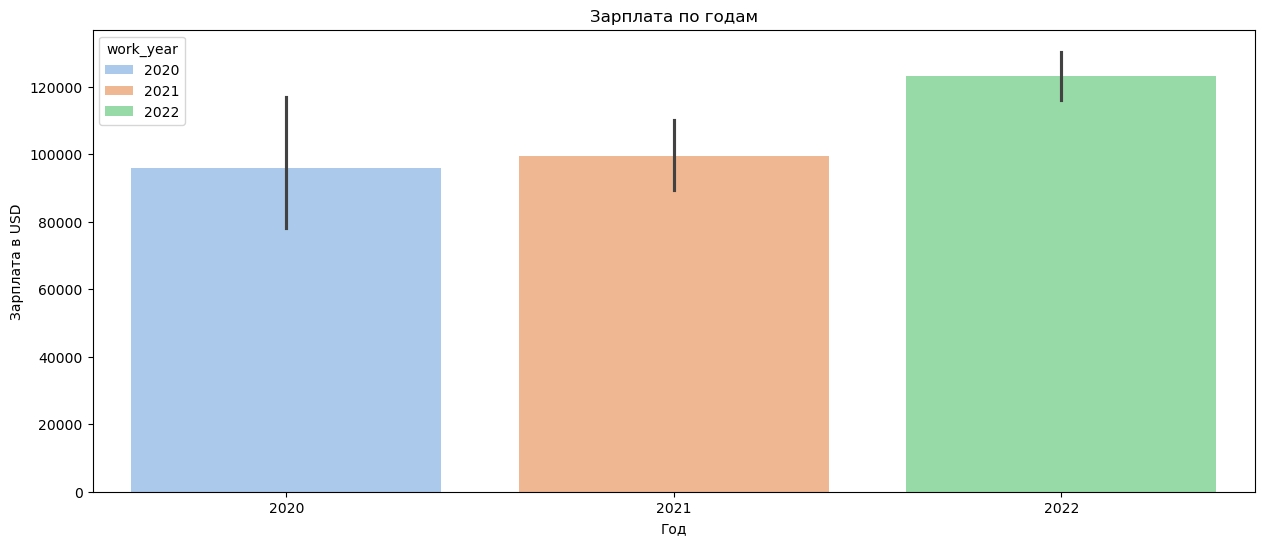

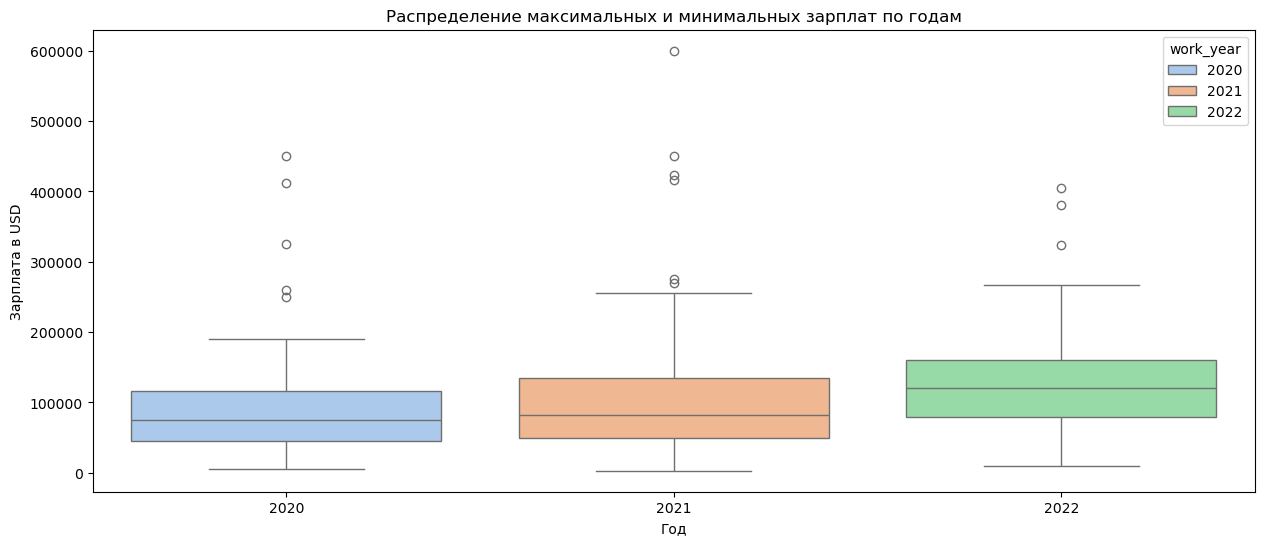

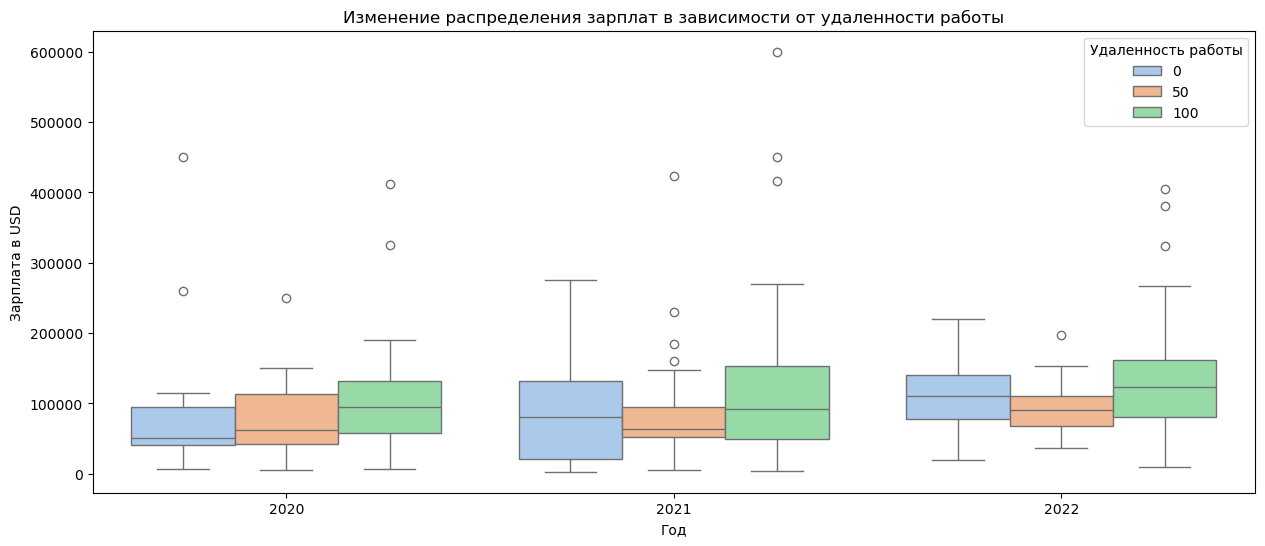

In [1190]:
# Установка размера фигуры для графика распределения зарплаты
plt.figure(figsize=(15, 6))
# Создание гистограммы распределения зарплат с линией плотности (KDE) и синим цветом
sns.histplot(df['salary_in_usd'], kde=True, color="skyblue")
# Задание заголовка графика
plt.title('Распределение зарплаты в USD')
# Задание названия оси X
plt.xlabel('Размер зарплаты')
# Задание названия оси Y
plt.ylabel('Частота')
# Отображение графика
plt.show()

# Установка размера фигуры для графика средней зарплаты по годам
plt.figure(figsize=(15, 6))
# Создание столбчатой диаграммы средней зарплаты по годам с разными цветами для каждого года
sns.barplot(x='work_year', y='salary_in_usd', data=df, estimator=np.mean, hue='work_year', palette='pastel')
# Задание заголовка графика
plt.title('Зарплата по годам')
# Задание названия оси X
plt.xlabel('Год')
# Задание названия оси Y
plt.ylabel('Зарплата в USD')
# Отображение графика
plt.show()

# Установка размера фигуры для графика распределения максимальных и минимальных зарплат по годам
plt.figure(figsize=(15, 6))
# Создание ящиковой диаграммы для визуализации распределения зарплат по годам
sns.boxplot(x='work_year', y='salary_in_usd', data=df, hue='work_year', palette='pastel')
# Задание заголовка графика
plt.title('Распределение максимальных и минимальных зарплат по годам')
# Задание названия оси X
plt.xlabel('Год')
# Задание названия оси Y
plt.ylabel('Зарплата в USD')
# Отображение графика
plt.show()

# Установка размера фигуры для графика изменения распределения зарплат в зависимости от удаленности работы
plt.figure(figsize=(15, 6))
# Создание ящиковой диаграммы для визуализации изменения распределения зарплат в зависимости от удаленности работы
sns.boxplot(x='work_year', y='salary_in_usd', data=df, hue='remote_ratio', palette='pastel')
# Задание заголовка графика
plt.title('Изменение распределения зарплат в зависимости от удаленности работы')
# Задание названия оси X
plt.xlabel('Год')
# Задание названия оси Y
plt.ylabel('Зарплата в USD')
# Добавление легенды с заголовком 'Удаленность работы'
plt.legend(title='Удаленность работы')
# Отображение графика
plt.show()

**Выводы:**  

**График 1 - Распределение зарплаты в USD:**  
Наблюдается концентрация значений в нижнем диапазоне зарплат, что указывает на большее количество людей с относительно низкими доходами.
Распределение имеет положительную асимметрию, подтверждаемую коэффициентом асимметрии 1.73.  

**График 2 - Средняя зарплата по годам:**  
Виден рост средней зарплаты с 95 813 USD в 2020 году до 123 089 USD в 2022 году.
Это соответствует общему тренду на увеличение зарплат в индустрии данных.  

**График 3 - Распределение максимальных и минимальных зарплат по годам:**  
Максимальные зарплаты показывают значительный рост, особенно в 2021 году, что может быть связано с увеличением спроса на высококвалифицированных специалистов.  

**График 4 - Изменение распределения зарплат в зависимости от удаленности работы:**  
Распределение зарплат меняется в зависимости от удаленности работы, что может отражать различия в оплате труда на удаленных и офисных должностях.  

**Причины и гипотезы:**  
- Увеличение средней зарплаты может быть связано с ростом спроса на специалистов в области данных и увеличением стоимости жизни.   
- Положительная асимметрия распределения зарплат может указывать на наличие высокооплачиваемых ролей, доступных ограниченному числу специалистов.    
- Глобальные тенденции в индустрии данных и технологий.  
- Изменения в экономической ситуации и влияние пандемии COVID-19.  

Анализ показывает положительную динамику в оплате труда в индустрии данных, с увеличением средней и максимальной зарплаты. Однако существует значительный разброс в оплате, что требует дополнительного внимания при планировании карьеры и переговорах о зарплате. Важно также учитывать изменения в условиях работы, такие как удаленность, которые могут влиять на уровень дохода. 

In [1191]:
# Импорт модуля stats из библиотеки scipy для выполнения статистического анализа 
# почему то данному коду не достаточно прописать импорт бибилотек в начале задания,
# и если убрать строку импорта отсюда, он выдает ошибку при нажании кнопки "выполнить все" в VS Code.
from scipy import stats

# Получение уникальных значений годов из столбца 'work_year' датафрейма df
years = df['work_year'].unique()

# Инициализация двух словарей для хранения статистических данных по годам для каждой профессии
ds_stats_by_year = {}
de_stats_by_year = {}

# Цикл по каждому году
for year in years:
    # Фильтрация данных для 'Data Scientist' за определенный год
    ds_data_by_year = df[(df['job_title'] == 'Data Scientist') & (df['work_year'] == year)]
    # Расчет и сохранение статистических данных для 'Data Scientist' за определенный год
    ds_stats_by_year[year] = {
        'count': ds_data_by_year.shape[0],
        'mean': ds_data_by_year['salary_in_usd'].mean(),
        'std': ds_data_by_year['salary_in_usd'].std(),
        'min': ds_data_by_year['salary_in_usd'].min(),
        'max': ds_data_by_year['salary_in_usd'].max(),
        'quantiles': ds_data_by_year['salary_in_usd'].quantile([0.25, 0.5, 0.75]).to_list(),
        'normaltest_pvalue': stats.normaltest(ds_data_by_year['salary_in_usd'].dropna()).pvalue,
        'mad': (ds_data_by_year['salary_in_usd'] - ds_data_by_year['salary_in_usd'].median()).abs().median(),
        'skewness': ds_data_by_year['salary_in_usd'].skew(),
        'kurtosis': ds_data_by_year['salary_in_usd'].kurtosis()
    }

# Расчет статистик для Data Engineer каждого года
for year in years:
    # Фильтрация данных для 'Data Engineer' за определенный год
    de_data_by_year = df[(df['job_title'] == 'Data Engineer') & (df['work_year'] == year)]
    # Расчет и сохранение статистических данных для 'Data Engineer' за определенный год
    de_stats_by_year[year] = {
        'count': de_data_by_year.shape[0],
        'mean': de_data_by_year['salary_in_usd'].mean(),
        'std': de_data_by_year['salary_in_usd'].std(),
        'min': de_data_by_year['salary_in_usd'].min(),
        'max': de_data_by_year['salary_in_usd'].max(),
        'quantiles': de_data_by_year['salary_in_usd'].quantile([0.25, 0.5, 0.75]).to_list(),
        'normaltest_pvalue': stats.normaltest(de_data_by_year['salary_in_usd'].dropna()).pvalue,
        'mad': (de_data_by_year['salary_in_usd'] - de_data_by_year['salary_in_usd'].median()).abs().median(),
        'skewness': de_data_by_year['salary_in_usd'].skew(),
        'kurtosis': de_data_by_year['salary_in_usd'].kurtosis()
    }

# Фильтрация данных для 'Data Scientist' за все года
ds_data_all = df[df['job_title'] == 'Data Scientist']
# Расчет и сохранение статистических данных для 'Data Scientist' за все года
ds_stats_all = {
    'count': ds_data_all.shape[0],
    'mean': ds_data_all['salary_in_usd'].mean(),
    'std': ds_data_all['salary_in_usd'].std(),
    'min': ds_data_all['salary_in_usd'].min(),
    'max': ds_data_all['salary_in_usd'].max(),
    'quantiles': ds_data_all['salary_in_usd'].quantile([0.25, 0.5, 0.75]).to_list(),
    'normaltest_pvalue': stats.normaltest(ds_data_all['salary_in_usd'].dropna()).pvalue,
    'mad': (ds_data_all['salary_in_usd'] - ds_data_all['salary_in_usd'].median()).abs().median(),
    'skewness': ds_data_all['salary_in_usd'].skew(),
    'kurtosis': ds_data_all['salary_in_usd'].kurtosis()
}

# Фильтрация данных для 'Data Engineer' за все года
de_data_all = df[df['job_title'] == 'Data Engineer']
# Расчет и сохранение статистических данных для 'Data Engineer' за все года
de_stats_all = {
    'count': de_data_all.shape[0],
    'mean': de_data_all['salary_in_usd'].mean(),
    'std': de_data_all['salary_in_usd'].std(),
    'min': de_data_all['salary_in_usd'].min(),
    'max': de_data_all['salary_in_usd'].max(),
    'quantiles': de_data_all['salary_in_usd'].quantile([0.25, 0.5, 0.75]).to_list(),
    'normaltest_pvalue': stats.normaltest(de_data_all['salary_in_usd'].dropna()).pvalue,
    'mad': (de_data_all['salary_in_usd'] - de_data_all['salary_in_usd'].median()).abs().median(),
    'skewness': de_data_all['salary_in_usd'].skew(),
    'kurtosis': de_data_all['salary_in_usd'].kurtosis()
}

# Вывод результатов для Data Scientist
print(f"Общая статистика для Data Scientist:")
print(f"Количество записей: {ds_stats_all['count']}")
print(f"Средняя зарплата: {ds_stats_all['mean']} USD")
print(f"Стандартное отклонение: {ds_stats_all['std']} USD")
print(f"Минимальная зарплата: {ds_stats_all['min']} USD")
print(f"Максимальная зарплата: {ds_stats_all['max']} USD")
print(f"Квантили: {ds_stats_all['quantiles']}")
print(f"P-значение теста на нормальность: {ds_stats_all['normaltest_pvalue']}")
print(f"Медианное абсолютное отклонение (МАО): {ds_stats_all['mad']} USD")
print(f"Коэффициент асимметрии: {ds_stats_all['skewness']}")
print(f"Коэффициент эксцесса: {ds_stats_all['kurtosis']}\n")

print(f"Статистика для Data Scientist по годам:")
for year, stats in ds_stats_by_year.items():
    print(f"Год: {year}")
    print(f"Количество записей: {stats['count']}")
    print(f"Средняя зарплата: {stats['mean']} USD")
    print(f"Стандартное отклонение: {stats['std']} USD")
    print(f"Минимальная зарплата: {stats['min']} USD")
    print(f"Максимальная зарплата: {stats['max']} USD")
    print(f"Квантили: {stats['quantiles']}")
    print(f"P-значение теста на нормальность: {stats['normaltest_pvalue']}")
    print(f"Медианное абсолютное отклонение (МАО): {stats['mad']} USD")
    print(f"Коэффициент асимметрии: {stats['skewness']}")
    print(f"Коэффициент эксцесса: {stats['kurtosis']}\n")

# Вывод результатов для Data Engineer
print(f"Общая статистика для Data Engineer:")
print(f"Количество записей: {de_stats_all['count']}")
print(f"Средняя зарплата: {de_stats_all['mean']} USD")
print(f"Стандартное отклонение: {de_stats_all['std']} USD")
print(f"Минимальная зарплата: {de_stats_all['min']} USD")
print(f"Максимальная зарплата: {de_stats_all['max']} USD")
print(f"Квантили: {de_stats_all['quantiles']}")
print(f"P-значение теста на нормальность: {de_stats_all['normaltest_pvalue']}")
print(f"Медианное абсолютное отклонение (МАО): {de_stats_all['mad']} USD")
print(f"Коэффициент асимметрии: {de_stats_all['skewness']}")
print(f"Коэффициент эксцесса: {de_stats_all['kurtosis']}\n")

print(f"Статистика для Data Engineer по годам:")
for year, stats in de_stats_by_year.items():
    print(f"Год: {year}")
    print(f"Количество записей: {stats['count']}")
    print(f"Средняя зарплата: {stats['mean']} USD")
    print(f"Стандартное отклонение: {stats['std']} USD")
    print(f"Минимальная зарплата: {stats['min']} USD")
    print(f"Максимальная зарплата: {stats['max']} USD")
    print(f"Квантили: {stats['quantiles']}")
    print(f"P-значение теста на нормальность: {stats['normaltest_pvalue']}")
    print(f"Медианное абсолютное отклонение (МАО): {stats['mad']} USD")
    print(f"Коэффициент асимметрии: {stats['skewness']}")
    print(f"Коэффициент эксцесса: {stats['kurtosis']}\n")


Общая статистика для Data Scientist:
Количество записей: 130
Средняя зарплата: 103336.35384615384 USD
Стандартное отклонение: 63967.56205300938 USD
Минимальная зарплата: 2859 USD
Максимальная зарплата: 412000 USD
Квантили: [50330.25, 100000.0, 140400.0]
P-значение теста на нормальность: 6.654907638421684e-08
Медианное абсолютное отклонение (МАО): 46404.0 USD
Коэффициент асимметрии: 1.079652674708903
Коэффициент эксцесса: 3.004996101234142

Статистика для Data Scientist по годам:
Год: 2020
Количество записей: 21
Средняя зарплата: 85970.52380952382 USD
Стандартное отклонение: 81436.64871089616 USD
Минимальная зарплата: 21669 USD
Максимальная зарплата: 412000 USD
Квантили: [42197.0, 62726.0, 105000.0]
P-значение теста на нормальность: 1.1526513919972499e-09
Медианное абсолютное отклонение (МАО): 22810.0 USD
Коэффициент асимметрии: 3.4712572867642493
Коэффициент эксцесса: 13.931082134356831

Год: 2021
Количество записей: 44
Средняя зарплата: 70215.77272727272 USD
Стандартное отклонение: 45

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


**Выводы:**

**Data Scientist:**  
Средняя зарплата составляет 103 336 USD, что указывает на высокооплачиваемую специализацию. Разброс зарплат велик, как показывает стандартное отклонение в 63 967 USD.    

**Data Engineer:**  
Средняя зарплата немного выше и составляет 109 750 USD. Разброс зарплат также значителен, но меньше, чем у Data Scientist.  

**Статистика по годам:**  
**2020 год:** Для обеих профессий наблюдается более низкая средняя зарплата по сравнению с последующими годами, что может быть связано с экономическими последствиями пандемии COVID-19.  
**2021 год:** Средняя зарплата увеличивается, особенно для Data Engineer, что может отражать восстановление рынка после пандемии.  
**2022 год:** Средняя зарплата достигает пика для обеих профессий, что может быть связано с увеличением спроса на специалистов в области данных.  

**Причины и гипотезы:**  
- Существует тенденция к увеличению средней зарплаты с каждым годом, что может быть связано с ростом спроса на специалистов в области данных и увеличением стоимости жизни.  
- Положительная асимметрия распределения зарплат может указывать на наличие высокооплачиваемых ролей, доступных ограниченному числу специалистов. 
- Глобальные тенденции в индустрии данных и технологий.  
- Изменения в экономической ситуации и влияние пандемии COVID-19.  

Анализ показывает положительную динамику в оплате труда в индустрии данных, с увеличением средней и максимальной зарплаты. Однако существует значительный разброс в оплате, что требует дополнительного внимания при планировании карьеры и переговорах о зарплате. Важно также учитывать изменения в условиях работы, такие как удаленность, которые могут влиять на уровень дохода.   

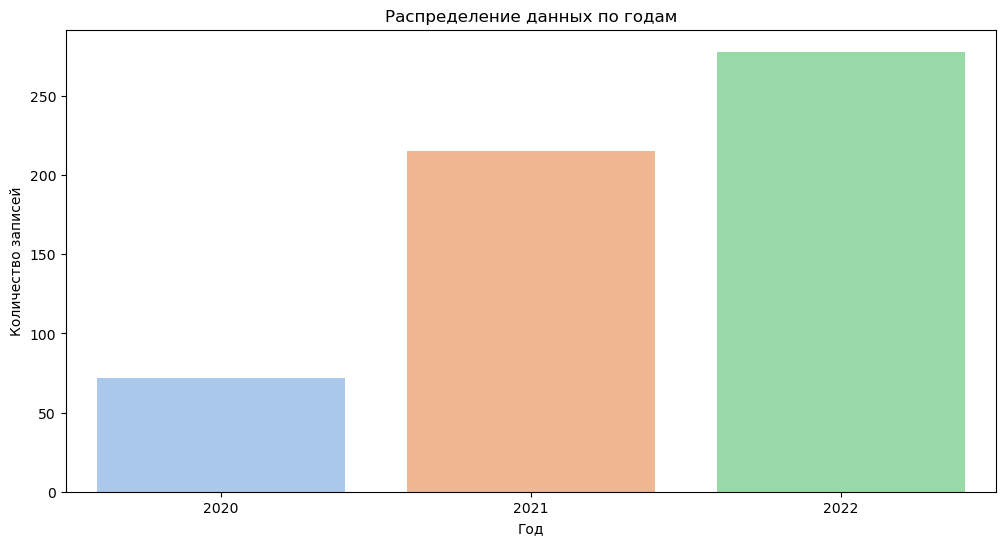

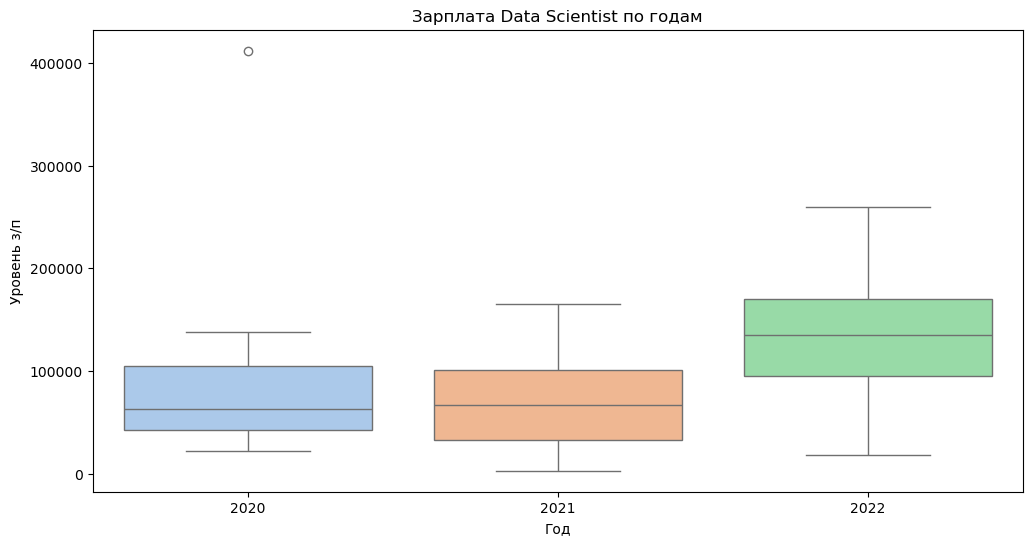

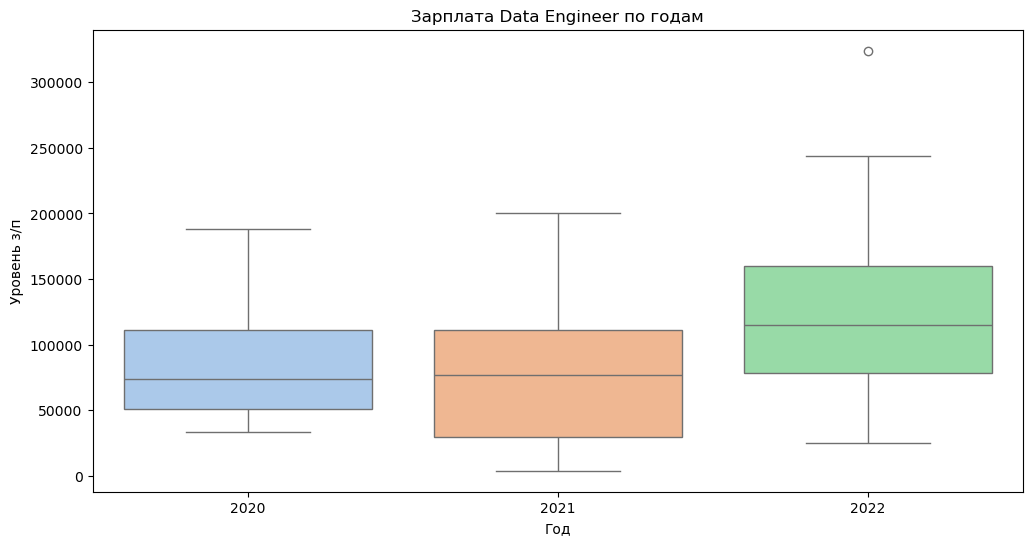

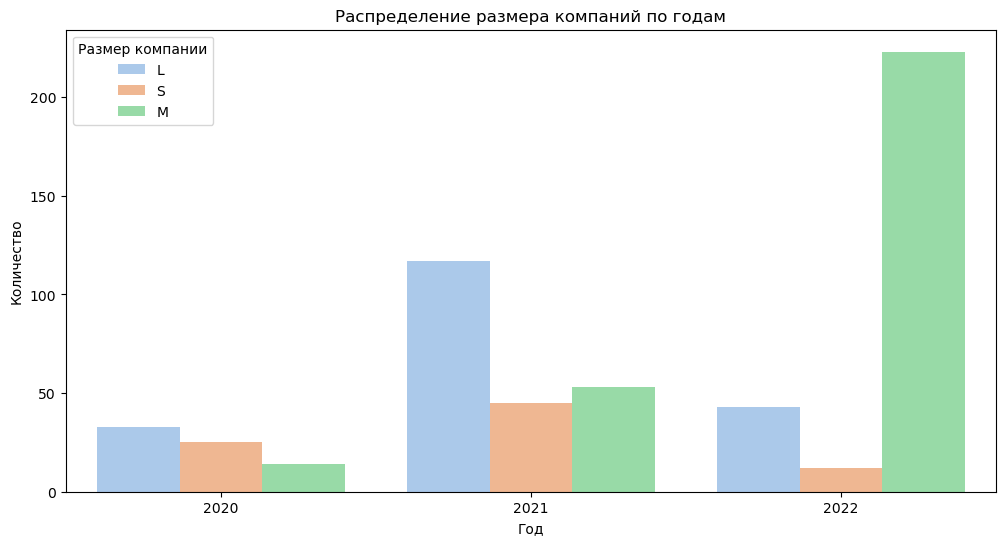

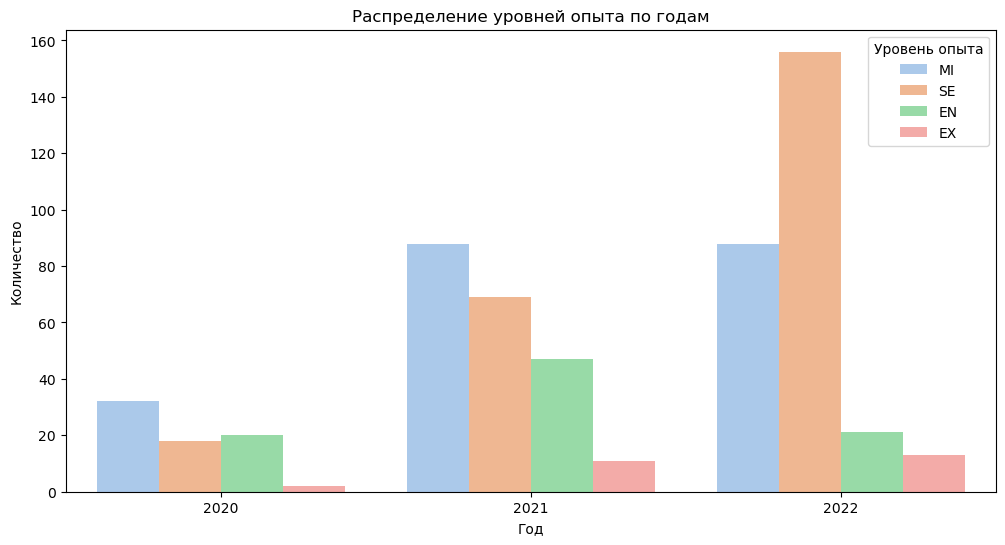

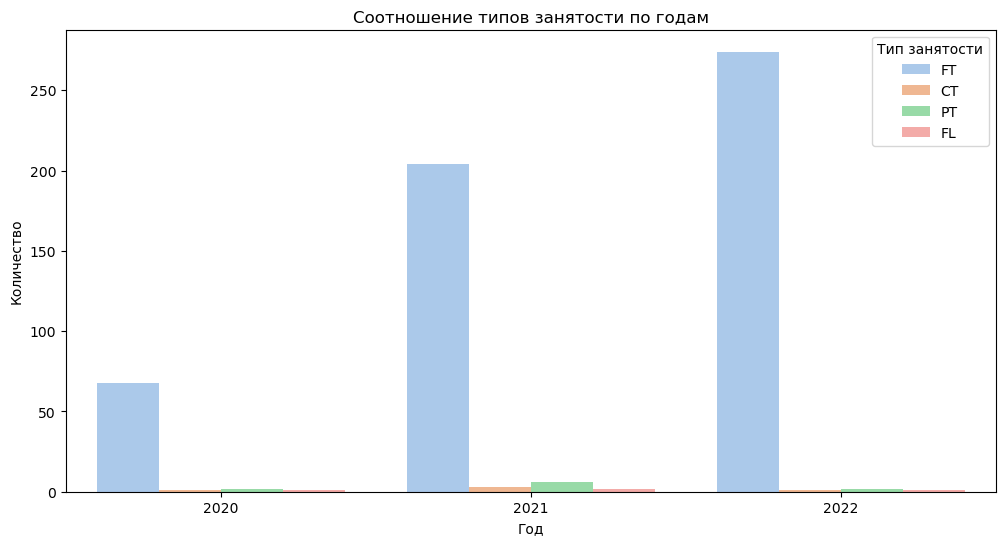

In [1192]:
# Создание визуализации с разноцветными столбцами для отображения распределения данных по годам
plt.figure(figsize=(12, 6))
sns.countplot(x='work_year', data=df, hue='work_year', palette="pastel", dodge=False)
# Настройка заголовка и меток осей
plt.title('Распределение данных по годам')
plt.xlabel('Год')
plt.ylabel('Количество записей')
# Удаление легенды, так как она не нужна для этого графика
plt.legend([],[], frameon=False)
plt.show()

# Фильтрация данных для роли 'Data Scientist' и создание boxplot для отображения распределения зарплат по годам
ds_data = df[df['job_title'] == 'Data Scientist']
plt.figure(figsize=(12, 6))
sns.boxplot(x='work_year', y='salary_in_usd', data=ds_data, hue='work_year', palette="pastel")
# Настройка заголовка и меток осей
plt.title('Зарплата Data Scientist по годам')
plt.xlabel('Год')
plt.ylabel('Уровень з/п')
# Удаление легенды, так как цвета соответствуют годам на оси X
plt.legend([],[], frameon=False)
plt.show()

# Аналогично предыдущему блоку, но для роли 'Data Engineer'
ds_data = df[df['job_title'] == 'Data Engineer']
plt.figure(figsize=(12, 6))
sns.boxplot(x='work_year', y='salary_in_usd', data=ds_data, hue='work_year', palette="pastel")
# Настройка заголовка и меток осей
plt.title('Зарплата Data Engineer по годам')
plt.xlabel('Год')
plt.ylabel('Уровень з/п')
# Удаление легенды, так как цвета соответствуют годам на оси X
plt.legend([],[], frameon=False)
plt.show()

# Создание визуализации для отображения распределения размера компаний по годам
plt.figure(figsize=(12, 6))
sns.countplot(x='work_year', data=df, hue='company_size', palette='pastel')
# Настройка заголовка и меток осей, добавление легенды с заголовком
plt.title('Распределение размера компаний по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='Размер компании')
plt.show()

# Визуализация распределения уровней опыта по годам
plt.figure(figsize=(12, 6))
sns.countplot(x='work_year', data=df, hue='experience_level', palette='pastel')
# Настройка заголовка и меток осей, добавление легенды с заголовком
plt.title('Распределение уровней опыта по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='Уровень опыта')
plt.show()

# Визуализация соотношения типов занятости по годам
plt.figure(figsize=(12, 6))
sns.countplot(x='work_year', data=df, hue='employment_type', palette='pastel')
# Настройка заголовка и меток осей, добавление легенды с заголовком
plt.title('Соотношение типов занятости по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.legend(title='Тип занятости')
plt.show()


**Выводы:**

**График 1 - Распределение данных по годам**  
Наблюдается увеличение количества запросов/записей с 2020 по 2022 год. Это может указывать на рост интереса к анализируемой области или на увеличение объема данных в целом.  

**График 2 - Зарплата Data Scientist по годам**  
Виден рост средней зарплаты, что согласуется с общими данными о росте средней зарплаты в данной сфере.  

**График 3 - Зарплата Data Engineer по годам**  
Также демонстрирует увеличение средней зарплаты, но с меньшим разбросом по сравнению с Data Scientist, что может свидетельствовать о более стабильном спросе на этих специалистов.  

**График 4 - Распределение размера компаний по годам**  
Отражает рост числа крупных компаний в 2022 году, что может быть связано с консолидацией рынка или расширением крупных игроков.  

**График 5 - Распределение уровней опыта по годам**  
Заметно, что количество специалистов с различным уровнем опыта меняется от года к году, что может отражать изменения в требованиях к квалификации или образовательных программах.  

**График 6 - Соотношение типов занятости по годам**  
Демонстрирует изменения в структуре занятости, возможно, связанные с экономическими факторами или тенденциями удаленной работы.  

**Причины и гипотезы:**  
- Увеличение средней зарплаты с каждым годом может быть связано с ростом спроса на специалистов в области данных.
- Рост числа крупных компаний может указывать на укрепление позиций крупного бизнеса в экономике.
- Изменения в структуре занятости могут быть результатом глобальных экономических изменений и перехода к более гибким формам трудоустройства.
- Глобализация и цифровизация экономики.
- Пандемия COVID-19 и связанные с ней изменения в сфере труда.

**Предложения:**  

Компаниям следует адаптировать стратегии найма и удержания сотрудников в соответствии с текущими тенденциями рынка труда.
Специалистам рекомендуется повышать квалификацию и следить за изменениями в требованиях к уровню опыта.

Анализ графиков и статистических данных показывает положительную динамику в сфере данных, с увеличением средней зарплаты и изменениями в структуре занятости.

### **2.2 Анализ признака experience_level (уровень опыта)**

In [1193]:
# Импорт модуля stats из библиотеки scipy для выполнения статистического анализа 
# почему то данному коду не достаточно прописать импорт бибилотек в начале задания,
# и если убрать строку импорта отсюда, он выдает ошибку при нажании кнопки "выполнить все" в VS Code.
from scipy import stats

# Получение уникальных значений уровней опыта
experience_levels = df['experience_level'].unique()

# Инициализация словаря для хранения статистик
salary_stats_by_experience = {}

# Расчет статистик для каждого уровня опыта
for level in experience_levels:
    # Фильтрация DataFrame по текущему уровню опыта
    data_by_level = df[df['experience_level'] == level]
    # Сохранение статистических данных в словарь
    salary_stats_by_experience[level] = {
        'count': data_by_level.shape[0],
        'mean': data_by_level['salary_in_usd'].mean(),
        'std': data_by_level['salary_in_usd'].std(),
        'min': data_by_level['salary_in_usd'].min(),
        'max': data_by_level['salary_in_usd'].max(),
        'quantiles': data_by_level['salary_in_usd'].quantile([0.25, 0.5, 0.75]).to_list(),
        'normaltest_pvalue': stats.normaltest(data_by_level['salary_in_usd'].dropna()).pvalue,
        'mad': (data_by_level['salary_in_usd'] - data_by_level['salary_in_usd'].median()).abs().median(),
        'skewness': data_by_level['salary_in_usd'].skew(),
        'kurtosis': data_by_level['salary_in_usd'].kurtosis()
    }

# Вывод статистических данных для каждого уровня опыта
for level, stats in salary_stats_by_experience.items():
    print(f"Статистика для уровня опыта {level}:")
    print(f"Количество записей: {stats['count']}")
    print(f"Средняя зарплата: {stats['mean']} USD")
    print(f"Стандартное отклонение: {stats['std']} USD")
    print(f"Минимальная зарплата: {stats['min']} USD")
    print(f"Максимальная зарплата: {stats['max']} USD")
    print(f"Квантили: {stats['quantiles']}")
    print(f"P-значение теста на нормальность: {stats['normaltest_pvalue']}")
    print(f"Медианное абсолютное отклонение (МАО): {stats['mad']} USD")
    print(f"Коэффициент асимметрии: {stats['skewness']}")
    print(f"Коэффициент эксцесса: {stats['kurtosis']}\n")

Статистика для уровня опыта MI:
Количество записей: 208
Средняя зарплата: 87792.99519230769 USD
Стандартное отклонение: 64118.97117436391 USD
Минимальная зарплата: 2859 USD
Максимальная зарплата: 450000 USD
Квантили: [47163.75, 76940.0, 112075.0]
P-значение теста на нормальность: 1.8987055029230342e-32
Медианное абсолютное отклонение (МАО): 31804.5 USD
Коэффициент асимметрии: 2.667552017538057
Коэффициент эксцесса: 11.937535452831572

Статистика для уровня опыта SE:
Количество записей: 243
Средняя зарплата: 138374.88065843622 USD
Стандартное отклонение: 59955.96501109225 USD
Минимальная зарплата: 18907 USD
Максимальная зарплата: 412000 USD
Квантили: [99531.5, 135000.0, 171881.0]
P-значение теста на нормальность: 1.657914037635115e-12
Медианное абсолютное отклонение (МАО): 35640.0 USD
Коэффициент асимметрии: 1.0178658784468528
Коэффициент эксцесса: 3.139841323535963

Статистика для уровня опыта EN:
Количество записей: 88
Средняя зарплата: 61643.318181818184 USD
Стандартное отклонение: 4

**Выводы:**

**MI (Junior):**   
Наблюдается большое количество записей (208), что может указывать на высокий спрос на начинающих специалистов. Средняя зарплата составляет 87,792 USD, но при этом есть значительный разброс (стандартное отклонение 64 118 USD), что может отражать разнообразие рынка и различные возможности для начинающих специалистов.  

**SE (Mid-level):**   
Самое большое количество записей (243) среди всех уровней опыта, средняя зарплата 138 374 USD. Это может говорить о том, что специалисты среднего уровня являются основой рынка труда в данной сфере.  

**EN (Senior):**   
Меньшее количество записей (88) с относительно низкой средней зарплатой 61 643 USD. Это может быть связано с более высокими требованиями к опыту и квалификации для получения более высокой зарплаты.  

**EX (Expert):**   
Наименьшее количество записей (26), но с наивысшей средней зарплатой 199 392 USD, что подчеркивает ценность высококвалифицированных экспертов на рынке.  

**Причины и гипотезы:**
- Существует прямая зависимость между уровнем опыта и средней зарплатой, что подтверждается увеличением средней зарплаты с ростом уровня опыта.
- Высокие коэффициенты асимметрии и эксцесса для уровней MI и EX могут указывать на наличие выбросов, таких как необычно высокие или низкие зарплаты, которые влияют на распределение.
- Различия в зарплатах могут быть обусловлены разнообразием рынка, географическими факторами и спецификой отраслей.
- Высокий спрос на специалистов среднего уровня может быть связан с потребностью в профессионалах, способных быстро интегрироваться в рабочие процессы.

**Общий вывод:** 
Рынок труда в сфере данных демонстрирует четкую зависимость зарплаты от уровня опыта. Специалисты начального и среднего уровня составляют большую часть рынка, в то время как эксперты, хоть и в меньшем количестве, получают значительно более высокую компенсацию. Это подчеркивает важность непрерывного обучения и профессионального развития в карьере специалиста по данным. 

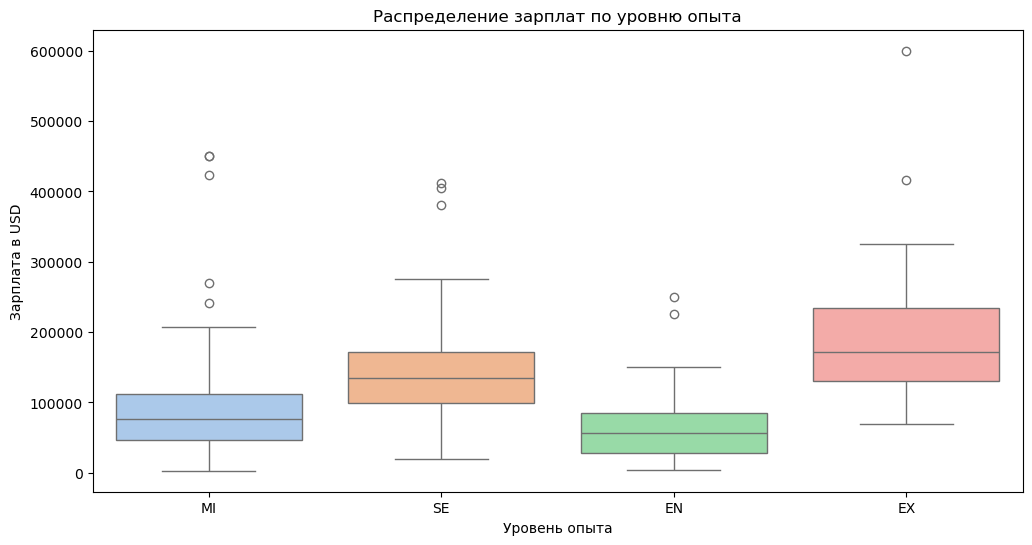

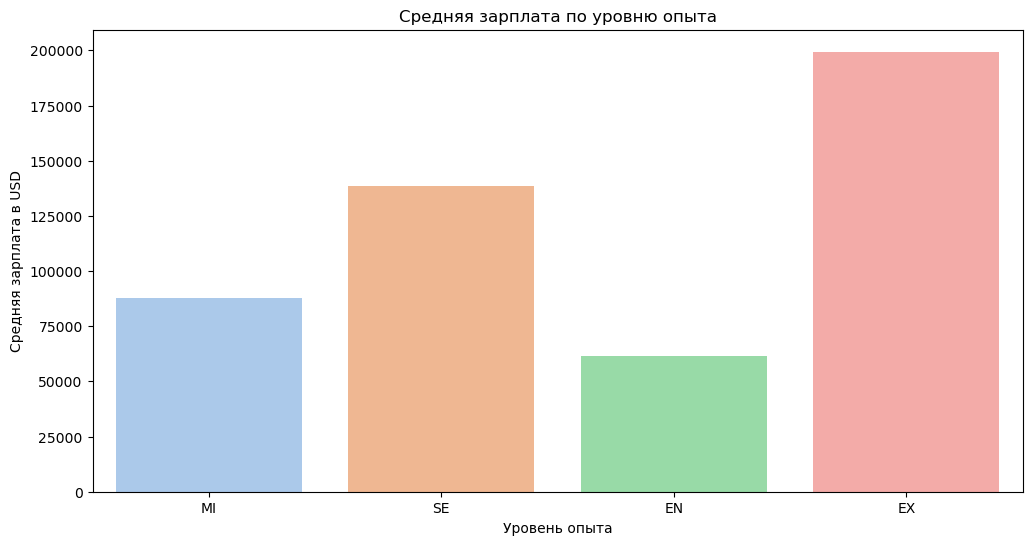

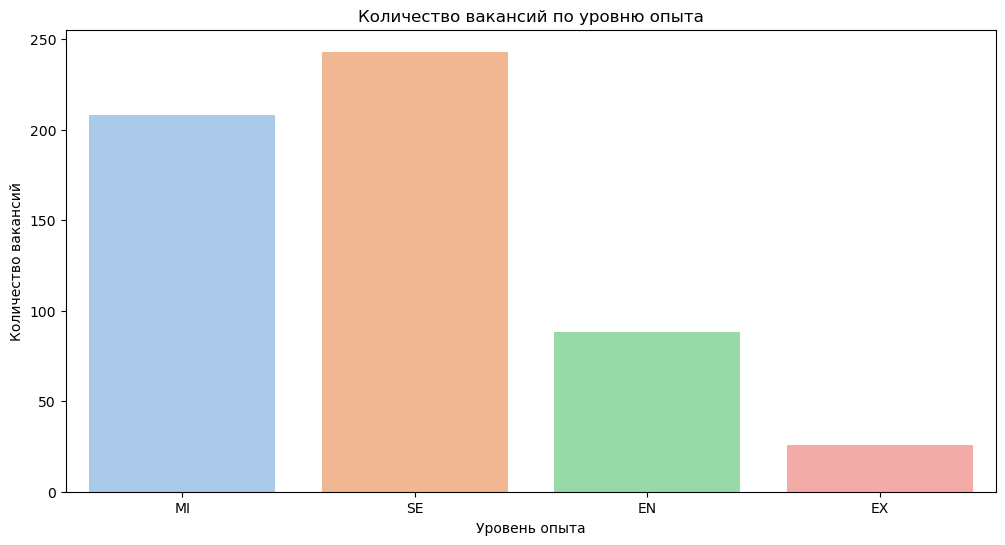

In [1194]:
# Распределение зарплат по уровню опыта
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, hue='experience_level', dodge=False, palette='pastel')
plt.title('Распределение зарплат по уровню опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Зарплата в USD')
plt.legend([],[], frameon=False)
plt.show()

# Средняя зарплата по уровню опыта
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=df, estimator=np.mean, errorbar=None, hue='experience_level', dodge=False, palette='pastel')
plt.title('Средняя зарплата по уровню опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Средняя зарплата в USD')
plt.legend([],[], frameon=False)
plt.show()

# Количество вакансий по уровню опыта
plt.figure(figsize=(12, 6))
sns.countplot(x='experience_level', data=df, hue='experience_level', dodge=False, palette='pastel')
plt.title('Количество вакансий по уровню опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Количество вакансий')
plt.legend([],[], frameon=False)
plt.show()

**Выводы:**

**График 1 - Распределение зарплат по уровню опыта**

Зарплаты варьируются от 0 до 600 000 USD, с наибольшим разбросом для уровня ‘EX’ и наименьшим для ‘MI’.
Наиболее высокие зарплаты наблюдаются у специалистов с уровнем ‘EX’, что указывает на ценность опыта. Зарплата в размере 600 000 USD для уровня опыта ‘EX’ может казаться аномально высокой, но это не обязательно ошибка, ниже несколько причин и гипотез:

- Специализация и уникальные навыки: Эксперты с уникальными навыками или высокоспециализированными знаниями в определенной области могут обладать высокими зарплатами.
- Руководящие должности: ‘EX’ может относиться к исполнительным или высшим руководящим должностям, которые часто связаны с высокими зарплатами.
- Дефицит специалистов: В определенных отраслях может наблюдаться дефицит высококвалифицированных специалистов, что приводит к повышению зарплат.
- Географическое положение: В некоторых регионах, особенно в крупных технологических центрах или финансовых столицах, уровень зарплат традиционно выше.
- Успешность компании: Специалисты, работающие в высокодоходных компаниях или стартапах с большим потенциалом, могут получать значительные денежные вознаграждения.


**График 2 - Средняя зарплата по уровню опыта**

Средние зарплаты увеличиваются от уровня ‘MI’ к ‘EX’. Существует прямая зависимость между уровнем опыта и средней зарплатой. Увеличение средней зарплаты может быть связано с ростом спроса на специалистов в области данных.

**График 3 - Количество вакансий по уровню опыта**

Больше всего вакансий для уровня ‘MI’, меньше всего для ‘EX’. Наблюдается наибольший спрос на специалистов начального уровня, что может быть связано с потребностью компаний в молодых талантах.

**Причины и гипотезы:**

- Глобализация и цифровизация экономики.
- Изменения в экономической ситуации и влияние пандемии COVID-19.

Анализ графиков показывает, что существует четкая зависимость зарплаты от уровня опыта. Рынок труда в сфере данных демонстрирует рост средней зарплаты и изменения в структуре занятости. Это требует гибкости и адаптации как от работодателей, так и от работников. Важно также учитывать изменения в условиях работы, которые могут влиять на уровень дохода. 

### **2.3 Анализ признака job_title (должность работника)**

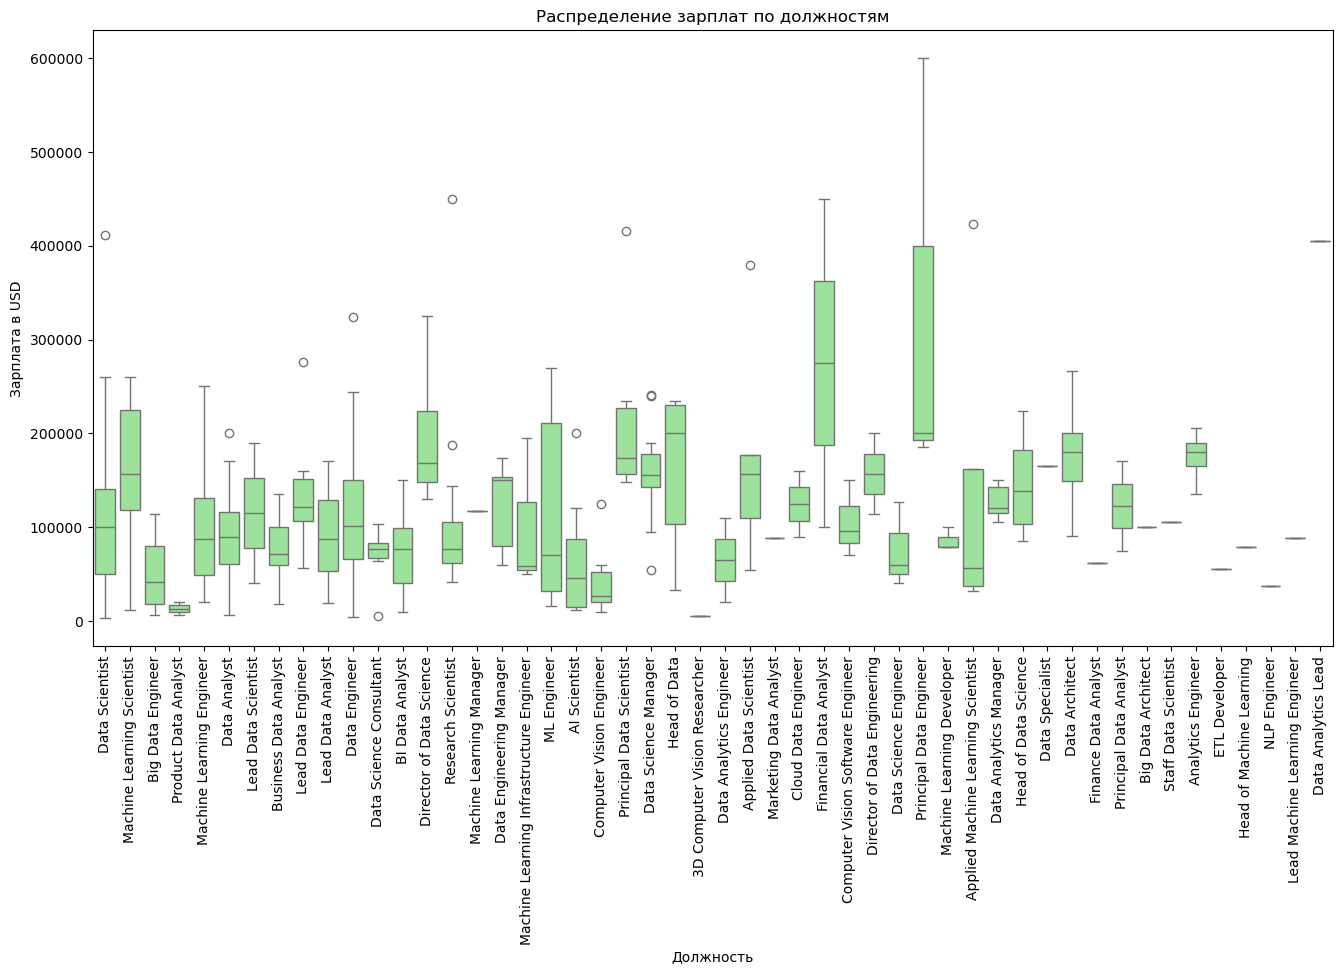

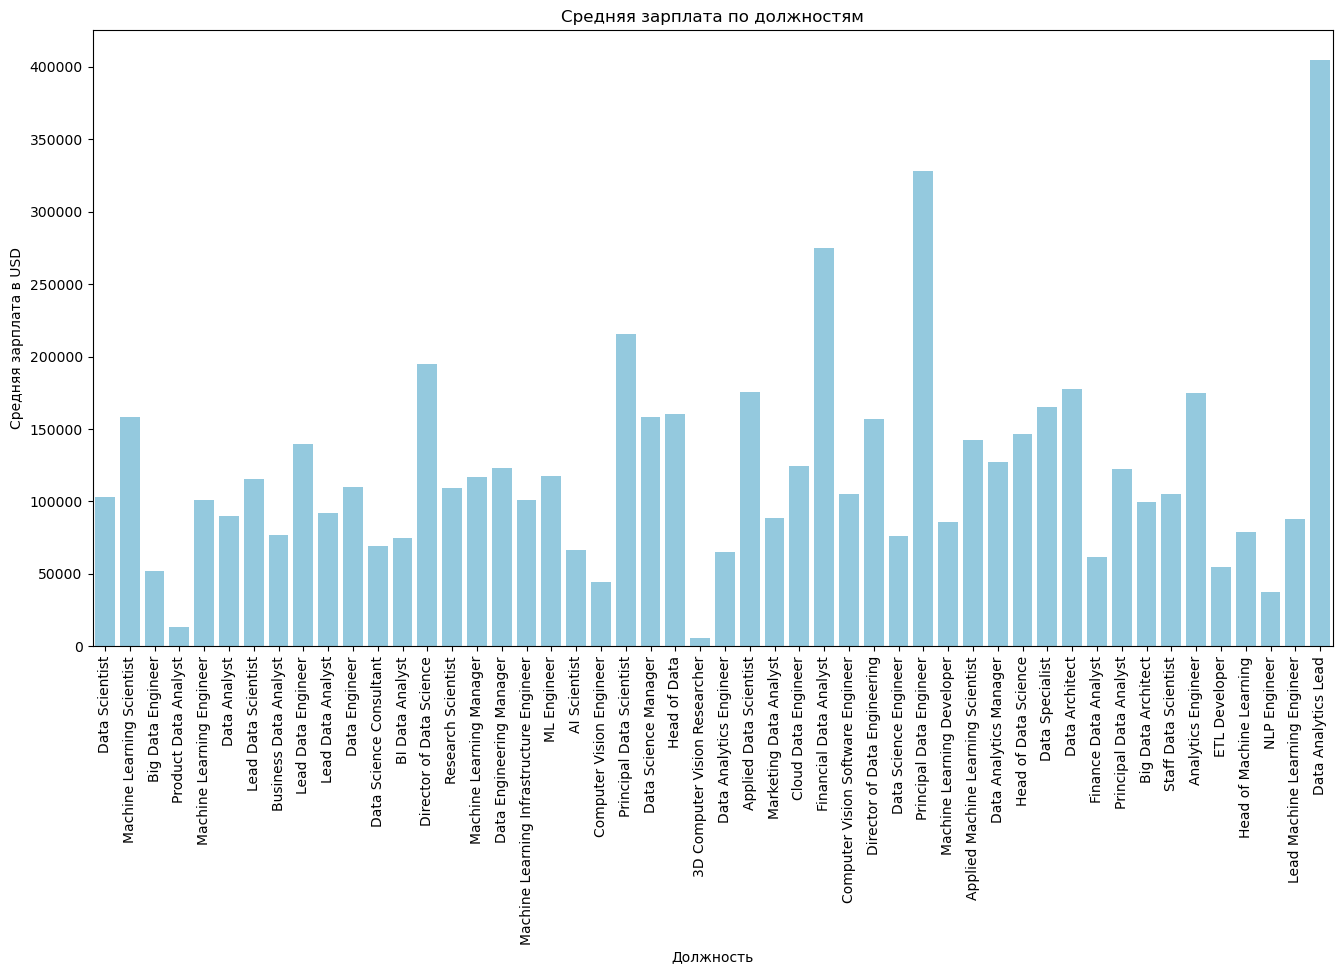

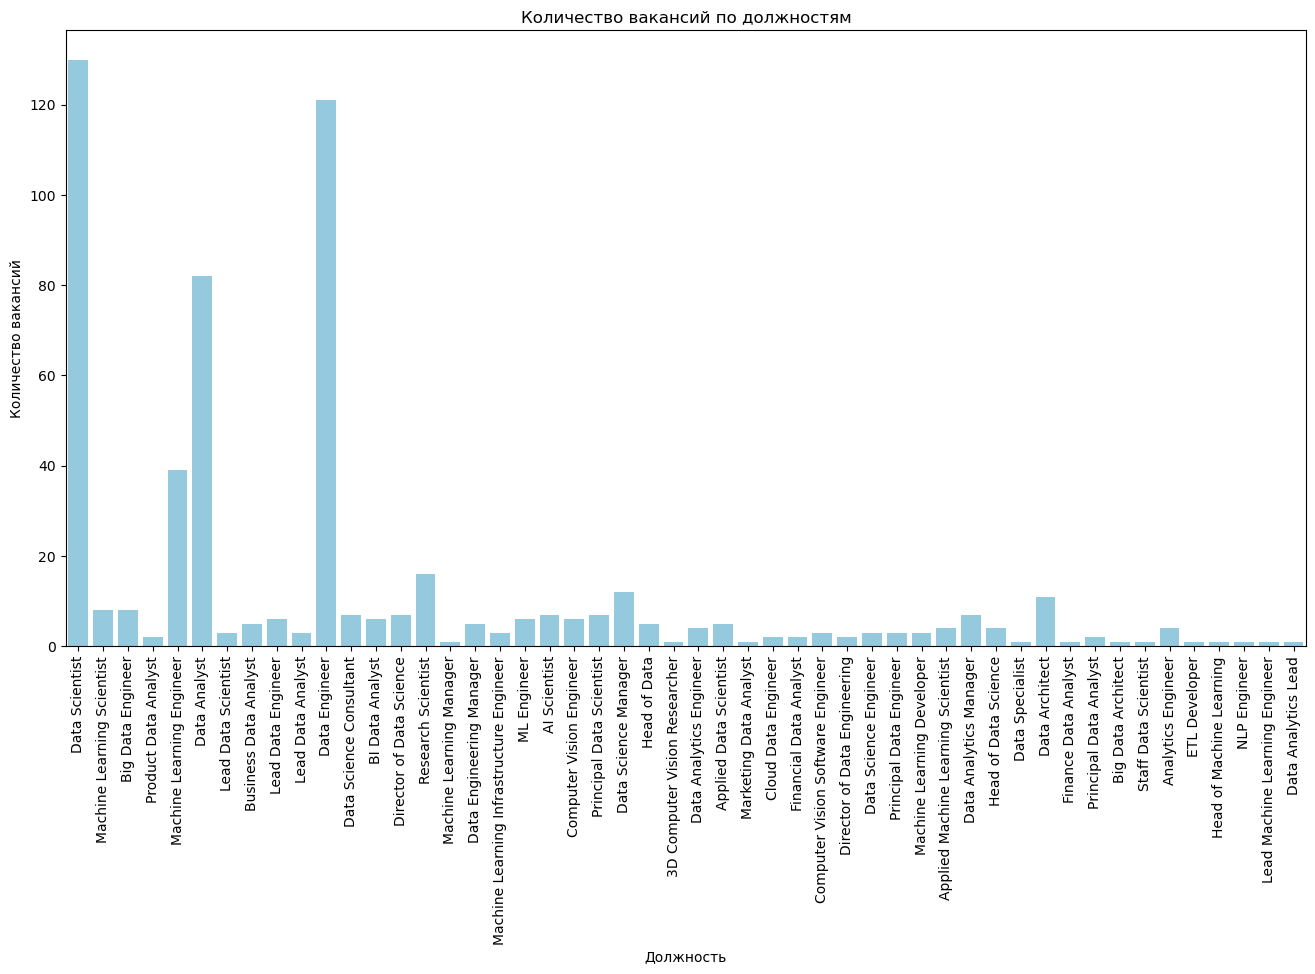

In [1195]:
# Распределение зарплат по должностям
plt.figure(figsize=(16, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=df, color="lightgreen")
plt.title('Распределение зарплат по должностям')
plt.xlabel('Должность')
plt.ylabel('Зарплата в USD')
plt.xticks(rotation=90)
plt.show()

# Средняя зарплата по должностям
plt.figure(figsize=(16, 8))
sns.barplot(x='job_title', y='salary_in_usd', data=df, estimator=np.mean, errorbar=None, color="skyblue")
plt.title('Средняя зарплата по должностям')
plt.xlabel('Должность')
plt.ylabel('Средняя зарплата в USD')
plt.xticks(rotation=90)
plt.show()

# Количество вакансий по должностям
plt.figure(figsize=(16, 8))
sns.countplot(x='job_title', data=df, color="skyblue")
plt.title('Количество вакансий по должностям')
plt.xlabel('Должность')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=90)
plt.show()

**Выводы:**

**График 1 - Распределение зарплат по должностям**  

**Data Scientist:** 

Зарплаты варьируются от низких до очень высоких, с медианными значениями, указывающими на значительные различия в оплате труда. Выбросы могут указывать на специалистов с высоким уровнем квалификации или уникальными навыками. 

**Data Analyst:** 

Наблюдается меньший разброс зарплат по сравнению с Data Scientist, что может отражать более стандартизированный уровень навыков и обязанностей в этой роли.  

**Data Engineer:** 

Зарплаты схожи с Data Analyst, но с потенциалом для более высоких доходов, возможно, из-за технической сложности и специфики работы.  

**График 2 - Средние зарплаты по регионам**  

**Data Scientist:** 

В регионах с высокими средними зарплатами Data Scientists могут получать компенсации, соответствующие высокому спросу и стоимости жизни в этих местах.  

**Data Analyst и Data Engineer:**

Средние зарплаты могут быть ниже, чем у Data Scientists, но также зависят от экономической ситуации в регионе.  

**График 3 - Количество вакансий по должностям**  

**Data Scientist:**  

Высокое количество вакансий отражает растущий спрос на данные профессии в индустрии.  

**Data Analyst и Data Engineer:** 

Наличие вакансий в этих ролях подчеркивает необходимость в аналитических и инженерных навыках на рынке труда.  

Профессии в сфере Data Science, включая Data Analyst и Data Engineer, являются востребованными и хорошо оплачиваемыми. Различия в зарплатах между регионами и должностями отражают экономическую ценность навыков и специализаций. Выбросы в данных о зарплатах могут указывать на наличие высокооплачиваемых специалистов или уникальных условий работы в определенных компаниях или регионах.  

### **2.4 Анализ признака employee_residence (место жительства сотрудника)**

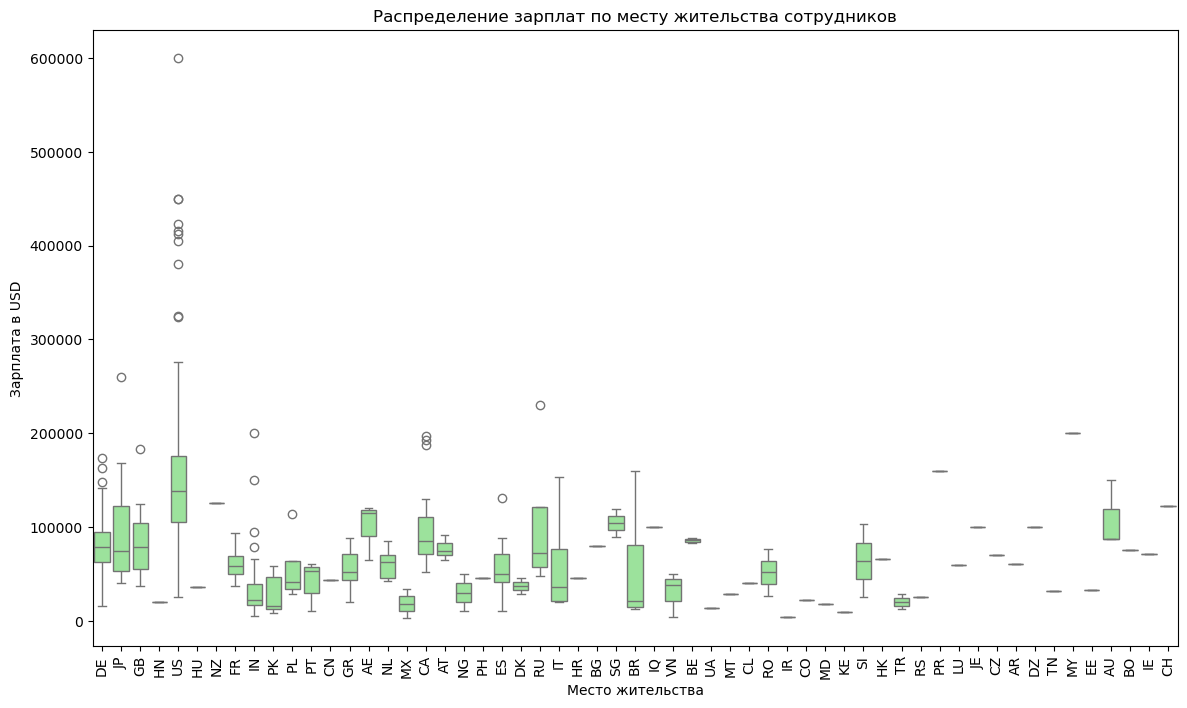

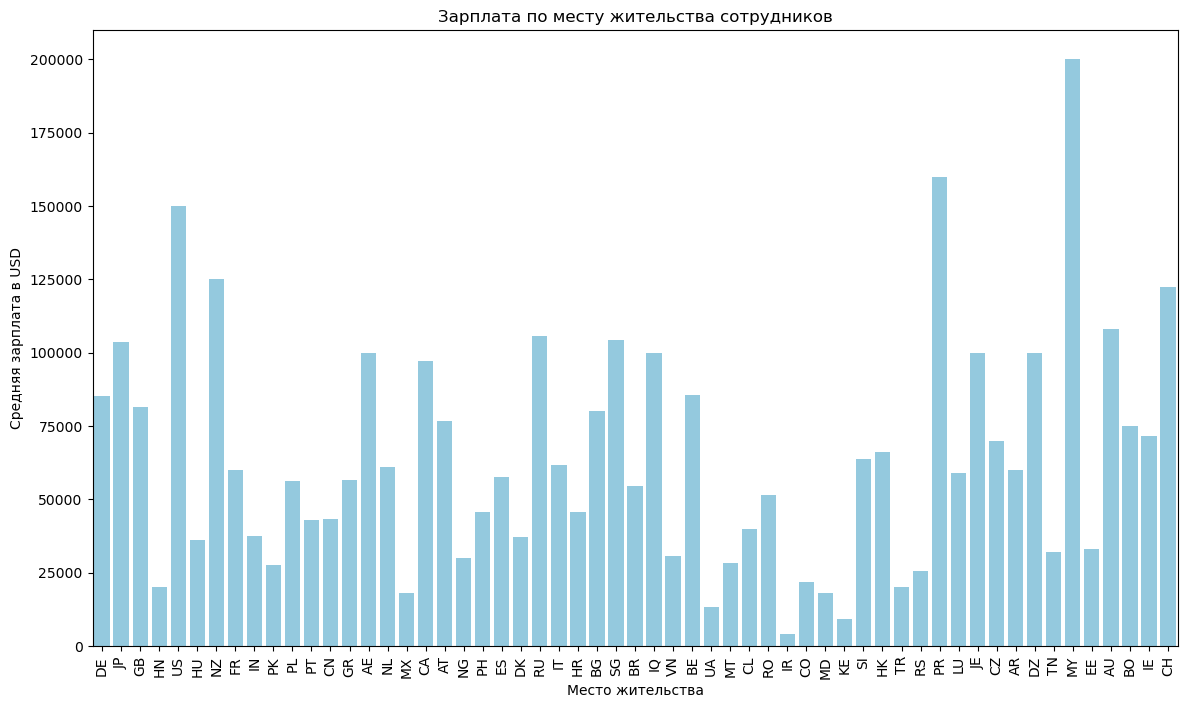

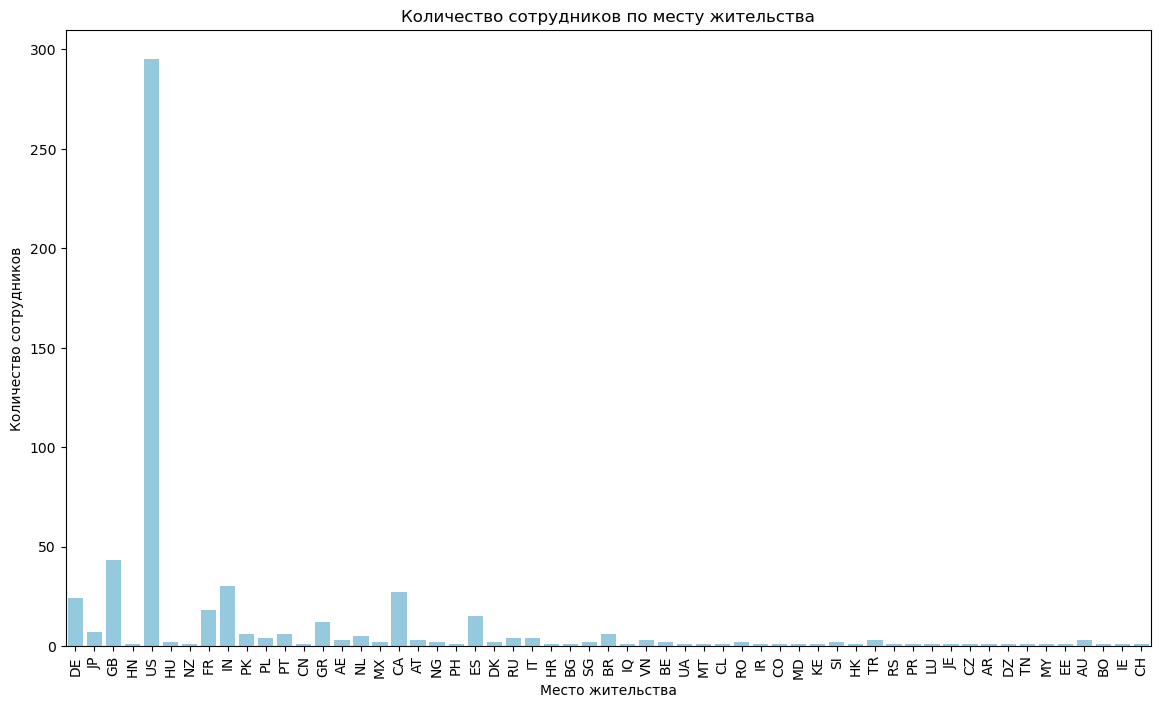

In [1196]:
# Распределение зарплат по месту жительства сотрудников
plt.figure(figsize=(14, 8))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=df, color="lightgreen")
plt.title('Распределение зарплат по месту жительства сотрудников')
plt.xlabel('Место жительства')
plt.ylabel('Зарплата в USD')
plt.xticks(rotation=90)
plt.show()

# Средняя зарплата по месту жительства сотрудников
plt.figure(figsize=(14, 8))
sns.barplot(x='employee_residence', y='salary_in_usd', data=df, estimator=np.mean, errorbar=None, color="skyblue")
plt.title('Зарплата по месту жительства сотрудников')
plt.xlabel('Место жительства')
plt.ylabel('Средняя зарплата в USD')
plt.xticks(rotation=90)
plt.show()

# Количество сотрудников по месту жительства
plt.figure(figsize=(14, 8))
sns.countplot(x='employee_residence', data=df, color="skyblue")
plt.title('Количество сотрудников по месту жительства')
plt.xlabel('Место жительства')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=90)
plt.show()

**Выводы:**

**График 1 - Распределение зарплат по месту жительства сотрудников**

Зарплаты варьируются от 0 до 600 000 USD, с медианными значениями и выбросами, указывающими на значительные различия в оплате труда между разными местами жительства. Высокие зарплаты наблюдаются у сотрудников, проживающих в экономически развитых регионах, что может отражать высокий уровень жизни и стоимость жизни в этих местах. Наличие выбросов может быть связано с особыми условиями работы, например, в крупных международных компаниях или в сфере высоких технологий.

**График 2 - Средняя зарплата по месту жительства сотрудников**

Средние зарплаты показывают разнообразие экономических условий в разных регионах, с наибольшими значениями в крупных городах или экономических центрах. Регионы с высокими средними зарплатами часто являются центрами притяжения квалифицированных специалистов и крупных компаний.

**График 3 - Количество сотрудников по месту жительства**

Количество сотрудников варьируется от 0 до 300, с наибольшим количеством сотрудников, проживающих в US, что может указывать на концентрацию компаний или рабочих мест в этом регионе.

Анализ показывает, что зарплаты и количество сотрудников сильно зависят от места жительства сотрудников и региональных экономических условий. Высокие зарплаты и большое количество сотрудников в определенных регионах могут отражать экономическую активность и спрос на высококвалифицированные кадры. Выбросы в данных о зарплатах могут указывать на наличие высокооплачиваемых специалистов или уникальных условий работы.

### **2.5 Анализ признака remote_ratio (удаленная работа)**

In [1197]:
from scipy import stats

# Получение уникальных значений доли удаленной работы
remote_ratios = df['remote_ratio'].unique()

# Инициализация словаря для хранения статистик
salary_stats_by_remote = {}

# Расчет статистик для каждой доли удаленной работы
for ratio in remote_ratios:
    # Фильтрация данных по текущей доле удаленной работы
    data_by_remote = df[df['remote_ratio'] == ratio]
    # Расчет и сохранение статистических данных по зарплатам
    salary_stats_by_remote[ratio] = {
        'count': data_by_remote.shape[0],
        'mean': data_by_remote['salary_in_usd'].mean(),
        'std': data_by_remote['salary_in_usd'].std(),
        'min': data_by_remote['salary_in_usd'].min(),
        'max': data_by_remote['salary_in_usd'].max(),
        'quantiles': data_by_remote['salary_in_usd'].quantile([0.25, 0.5, 0.75]).to_list(),
        'normaltest_pvalue': stats.normaltest(data_by_remote['salary_in_usd'].dropna()).pvalue,
        'mad': (data_by_remote['salary_in_usd'] - data_by_remote['salary_in_usd'].median()).abs().median(),
        'skewness': data_by_remote['salary_in_usd'].skew(),
        'kurtosis': data_by_remote['salary_in_usd'].kurtosis()
    }

# Вывод результатов
for ratio, stats in salary_stats_by_remote.items():
    print(f"Статистика для удаленной работы {ratio}%:")
    print(f"Количество записей: {stats['count']}")
    print(f"Средняя зарплата: {stats['mean']} USD")
    print(f"Стандартное отклонение: {stats['std']} USD")
    print(f"Минимальная зарплата: {stats['min']} USD")
    print(f"Максимальная зарплата: {stats['max']} USD")
    print(f"Квантили: {stats['quantiles']}")
    print(f"P-значение теста на нормальность: {stats['normaltest_pvalue']}")
    print(f"Медианное абсолютное отклонение (МАО): {stats['mad']} USD")
    print(f"Коэффициент асимметрии: {stats['skewness']}")
    print(f"Коэффициент эксцесса: {stats['kurtosis']}\n")

Статистика для удаленной работы 0%:
Количество записей: 121
Средняя зарплата: 105785.40495867768 USD
Стандартное отклонение: 68392.50033953268 USD
Минимальная зарплата: 2859 USD
Максимальная зарплата: 450000 USD
Квантили: [62000.0, 98158.0, 136000.0]
P-значение теста на нормальность: 2.2651036894646952e-10
Медианное абсолютное отклонение (МАО): 37842.0 USD
Коэффициент асимметрии: 1.383575110414945
Коэффициент эксцесса: 4.394519005573814

Статистика для удаленной работы 50%:
Количество записей: 98
Средняя зарплата: 80721.89795918367 USD
Стандартное отклонение: 57639.09669489899 USD
Минимальная зарплата: 5409 USD
Максимальная зарплата: 423000 USD
Квантили: [50000.5, 68010.5, 99925.75]
P-значение теста на нормальность: 1.6297106711352018e-18
Медианное абсолютное отклонение (МАО): 26282.0 USD
Коэффициент асимметрии: 2.6972009914964103
Коэффициент эксцесса: 12.570110550505943

Статистика для удаленной работы 100%:
Количество записей: 346
Средняя зарплата: 120763.19075144509 USD
Стандартное 

**Вывод:**

**Удаленная работа 0% (Офисная работа):**  

Средняя зарплата выше, чем при 50% удаленной работы, что может указывать на то, что офисные работники занимают более высокооплачиваемые должности или работают в отраслях с более высокими зарплатами.
Высокий коэффициент асимметрии и эксцесс говорят о том, что распределение зарплат скошено вправо с тяжелым правым хвостом, что может быть связано с наличием небольшого числа очень высоких зарплат, влияющих на среднее значение.  

**Удаленная работа 50% (Гибридная работа):**  

Средняя зарплата ниже, чем при полностью офисной работе, что может отражать различия в типах должностей, доступных для гибридной работы, или предпочтениях компаний по оплате таких позиций.
Очень высокий эксцесс указывает на наличие значительных выбросов, что может быть связано с особенностями определенных рынков или специфическими ролями, требующими гибридного формата работы.  

**Удаленная работа 100% (Полностью удаленная работа):**  

Средняя зарплата самая высокая среди всех категорий, что может свидетельствовать о том, что удаленная работа привлекает высококвалифицированных специалистов или связана с должностями, которые традиционно имеют более высокую оплату.  

**Причины и гипотезы:**  

- Наблюдается тенденция к увеличению средней зарплаты с переходом от офисной к полностью удаленной работе, что может быть связано с глобальными тенденциями рынка труда и изменением структуры спроса на специалистов.
- Рост популярности удаленной работы и ее привлекательность для высококвалифицированных специалистов.
- Различия в структуре компенсации в зависимости от формата работы.  

Данные показывают, что удаленная работа может быть связана с более высокой средней зарплатой и привлекательна для специалистов, ищущих гибкость и возможности для профессионального роста. Однако необходимо учитывать, что распределение зарплат среди удаленно работающих сотрудников имеет большую вариативность и склонность к выбросам. Это может быть связано с различными факторами, включая индустрию, специализацию и уровень должности.  

Компаниям стоит рассмотреть возможность предложения удаленной работы как инструмента для привлечения талантов и увеличения удовлетворенности сотрудников. 
Специалистам следует учитывать потенциальные преимущества удаленной работы, включая возможность получения более высокой зарплаты.  

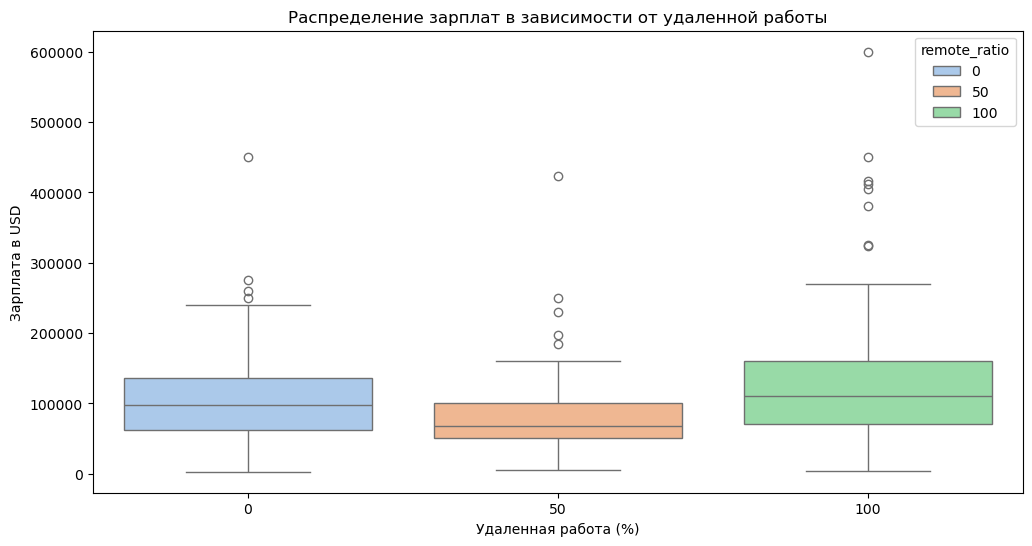

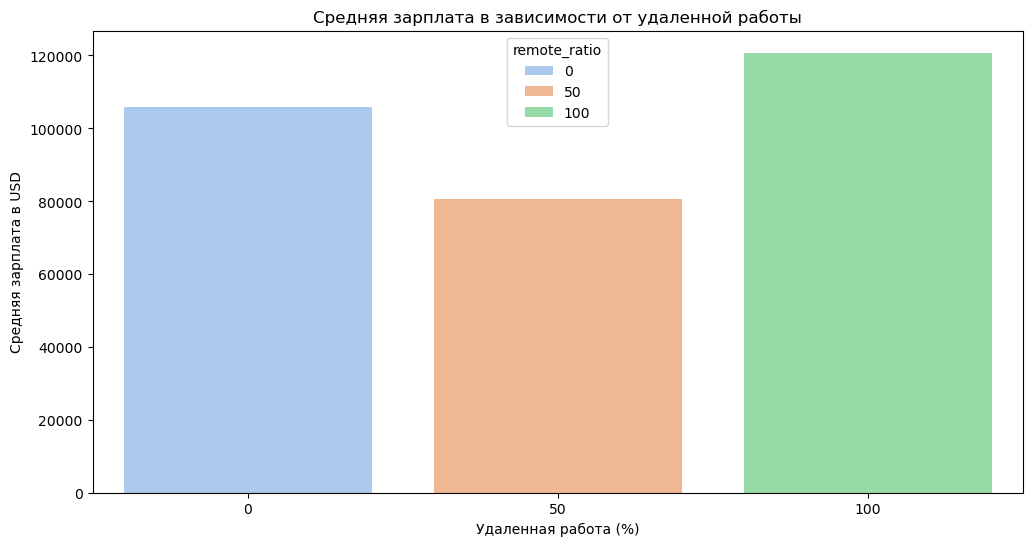

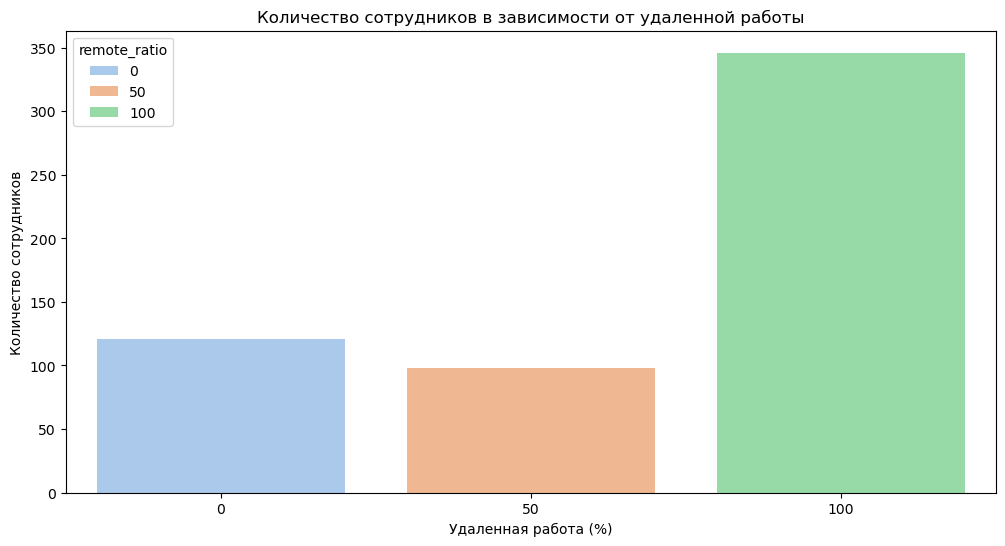

In [1198]:
# Распределение зарплат в зависимости от удаленной работы
plt.figure(figsize=(12, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df, hue='remote_ratio', palette='pastel')
plt.title('Распределение зарплат в зависимости от удаленной работы')
plt.xlabel('Удаленная работа (%)')
plt.ylabel('Зарплата в USD')
plt.show()

# Средняя зарплата в зависимости от удаленной работы
plt.figure(figsize=(12, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=df, estimator=np.mean, errorbar=None, hue='remote_ratio', palette='pastel')
plt.title('Средняя зарплата в зависимости от удаленной работы')
plt.xlabel('Удаленная работа (%)')
plt.ylabel('Средняя зарплата в USD')
plt.show()

# Количество сотрудников в зависимости от удаленной работы
plt.figure(figsize=(12, 6))
sns.countplot(x='remote_ratio', data=df, hue='remote_ratio', palette='pastel')
plt.title('Количество сотрудников в зависимости от удаленной работы')
plt.xlabel('Удаленная работа (%)')
plt.ylabel('Количество сотрудников')
plt.show()

**Выводы:**

**Офисная работа (0% удаленности):**

Характеризуется более высокой средней зарплатой по сравнению с гибридной работой, что может указывать на то, что офисные должности часто связаны с более высокими зарплатами или более высоким уровнем ответственности.

**Гибридная работа (50% удаленности):** 

Имеет более низкую среднюю зарплату и более высокий коэффициент асимметрии, что может свидетельствовать о большем разнообразии зарплат и возможно о большем количестве начальных или средних позиций в этой категории.

**Полностью удаленная работа (100% удаленности):** 

Показывает самую высокую среднюю зарплату и наибольшее количество выбросов, включая зарплату в 600 000 USD, что может быть связано с высоким спросом на специалистов, способных работать автономно, или с особыми условиями работы в технологических компаниях или стартапах.

**Причины и гипотезы:**

- Существует тенденция к увеличению средней зарплаты с увеличением доли удаленной работы, что может отражать текущие тенденции рынка труда, где удаленная работа становится все более ценной и востребованной.
- Выбросы, особенно на уровне 100% удаленной работы, могут указывать на наличие высокооплачиваемых специализированных ролей или успешных индивидуальных предпринимателей
- Рост цифровой экономики и увеличение количества работ, которые могут выполняться удаленно.
- Повышение стоимости жизни в крупных городах может приводить к увеличению зарплат для компенсации расходов сотрудников.

Анализ показывает, что удаленная работа может предложить более высокую среднюю зарплату и больше возможностей для специалистов. 
Компаниям следует учитывать возможность предложения удаленной работы как способа привлечения и удержания талантов, а также возможности для экономии на офисных расходах.
Сотрудникам рекомендуется рассмотреть возможности удаленной работы как потенциальный путь к увеличению дохода и улучшению баланса между работой и личной жизнью.


### **2.6 Анализ признака company_location (местоположение компании)**

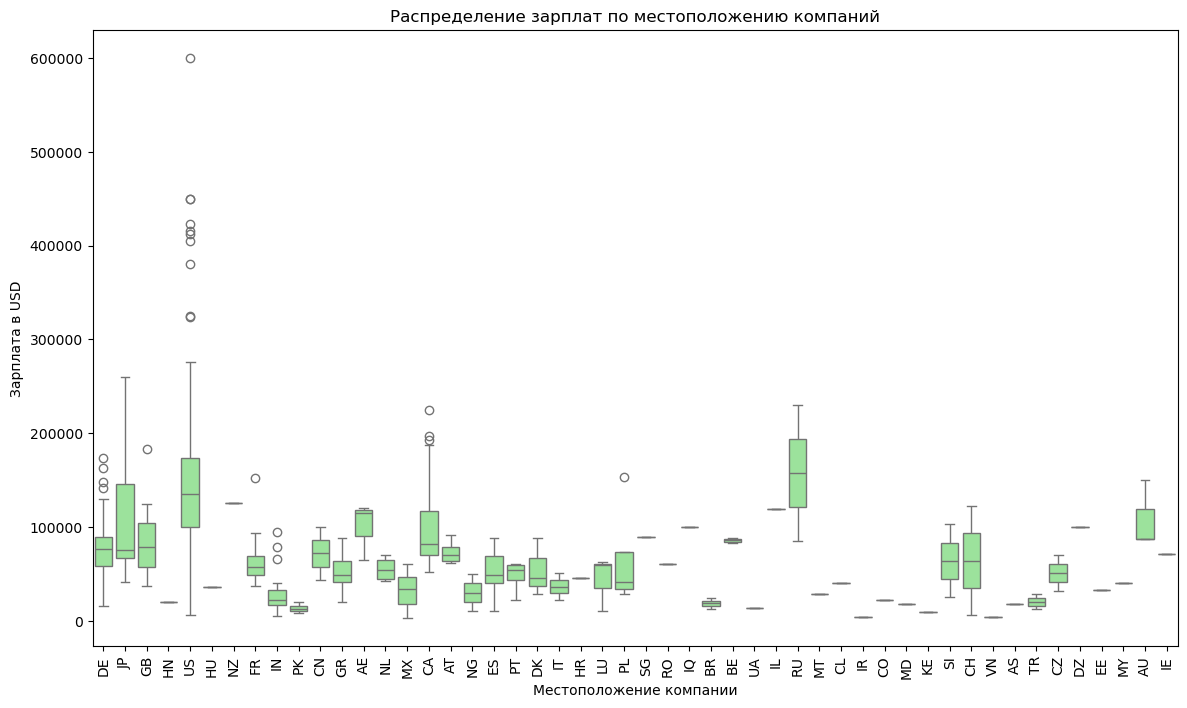

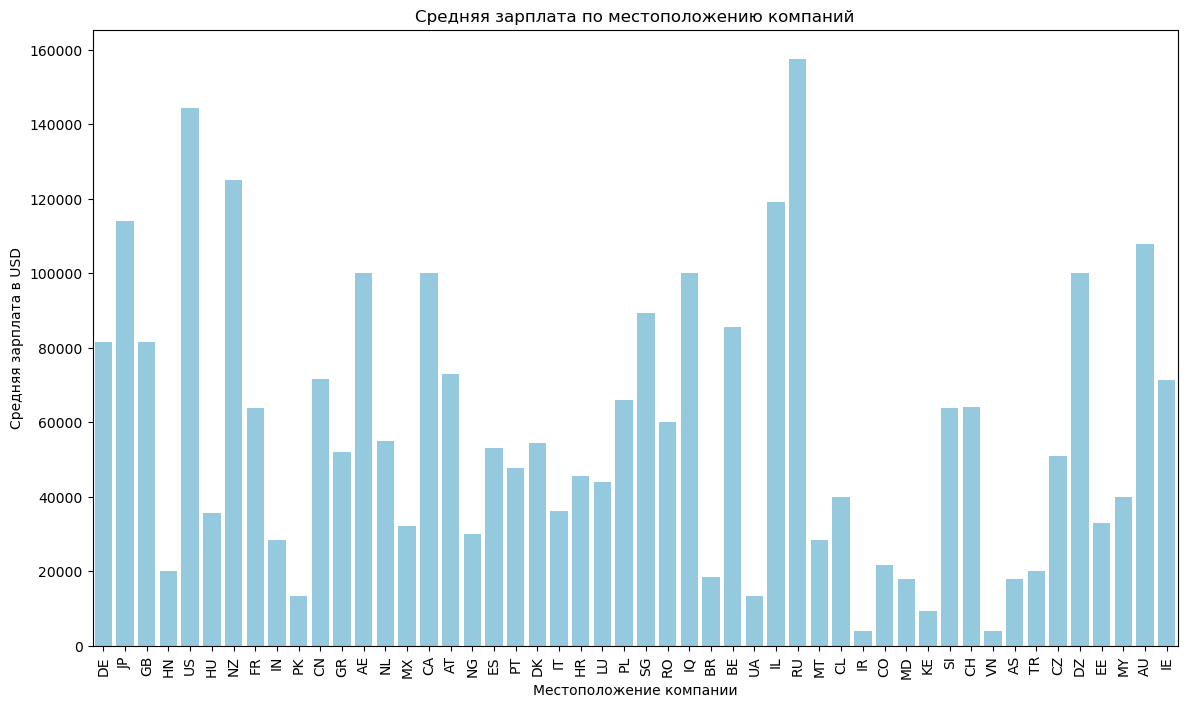

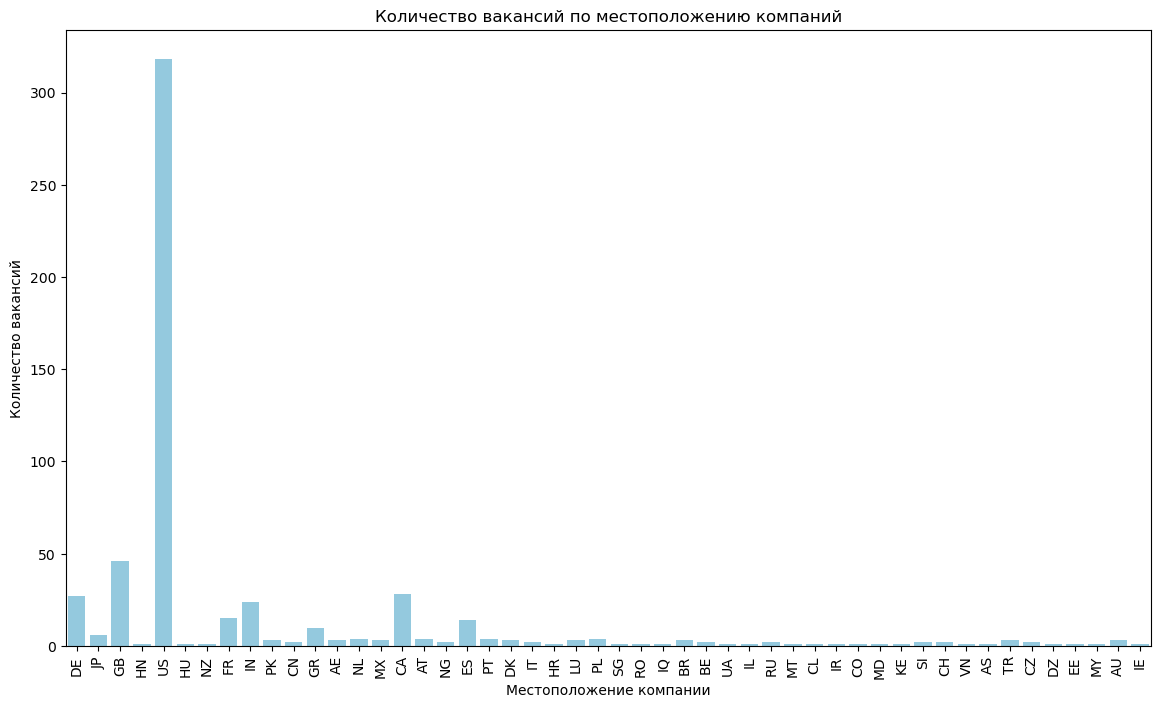

In [1199]:
# Распределение зарплат по местоположению компаний
plt.figure(figsize=(14, 8))
sns.boxplot(x='company_location', y='salary_in_usd', data=df, color="lightgreen")
plt.title('Распределение зарплат по местоположению компаний')
plt.xlabel('Местоположение компании')
plt.ylabel('Зарплата в USD')
plt.xticks(rotation=90)
plt.show()

# Средняя зарплата по местоположению компаний
plt.figure(figsize=(14, 8))
sns.barplot(x='company_location', y='salary_in_usd', data=df, estimator=np.mean, errorbar=None, color="skyblue")
plt.title('Средняя зарплата по местоположению компаний')
plt.xlabel('Местоположение компании')
plt.ylabel('Средняя зарплата в USD')
plt.xticks(rotation=90)
plt.show()

# Количество вакансий по местоположению компаний
plt.figure(figsize=(14, 8))
sns.countplot(x='company_location', data=df, color="skyblue")
plt.title('Количество вакансий по местоположению компаний')
plt.xlabel('Местоположение компании')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=90)
plt.show()

**График 1 - Распределение зарплат по местоположению компаний**

Зарплаты варьируются от 0 до 600 000 USD, с наибольшим разбросом для некоторых категорий. Некоторые местоположения компаний имеют значительно более высокие медианные зарплаты, что может указывать на экономические различия между регионами. Высокие значения выбросов могут быть связаны с руководящими позициями или высококвалифицированными специалистами в этих местоположениях.

**График 2 - Средняя зарплата по местоположению компаний**

Средние зарплаты колеблются в диапазоне от 20 000 до 160 000 USD. Возможно, компании с более высокими средними зарплатами занимаются более сложными проектами или находятся в регионах с высоким уровнем заработной платы. Выбросы отсутствуют, что может указывать на относительное равенство зарплат в данной отрасли.

**График 3 - Количество вакансий по местоположению компаний**

Количество вакансий варьируется от 0 до 300. Одно из местоположений имеет значительно большее количество вакансий, что может свидетельствовать о более высоком спросе на рабочую силу или о расширении компаний в этом регионе. В части выбросов, высокое количество вакансий в одном местоположении может быть вызвано открытием нового производства или крупным проектом.

Анализ показывает, что зарплаты и количество вакансий сильно зависят от местоположения компаний. Это может быть обусловлено экономическими, географическими и отраслевыми факторами. Выбросы в данных о зарплатах могут указывать на наличие высокооплачиваемых специализированных ролей или успешных индивидуальных предпринимателей в определенных регионах. 

Анализируя статистические данные и графики, можно заметить, что в США наблюдаются высокие зарплаты и значительное количество выбросов. 

Это может быть обусловлено несколькими факторами:
- **Развитая экономика:** США имеют одну из самых крупных и развитых экономик в мире, что создает высокодоходные рабочие места.
- **Высокий уровень образования:** В США значительные инвестиции в образование позволяют выпускникам получать квалифицированные профессии, что приводит к более высокой оплате труда.
- **Высокая производительность:** Благодаря инновационным технологиям и автоматизации, рабочие места в США часто обладают более высокой производительностью.
- **Конкуренция за таланты:** Сильная конкуренция между работодателями за квалифицированные кадры приводит к повышению зарплат.
- **Независимость переговоров о зарплате:** В США существует культура активных переговоров о зарплате, что позволяет работникам добиваться улучшения своих условий труда.


### **2.7 Анализ признака company_sizes (размер компании)**

In [1200]:
from scipy import stats

# Получение уникальных значений размеров компаний
company_sizes = df['company_size'].unique()

# Инициализация словаря для хранения статистик по размеру компании
salary_stats_by_company_size = {}

# Расчет статистик для каждого размера компании
for size in company_sizes:
    # Фильтрация данных по размеру компании
    data_by_size = df[df['company_size'] == size]
    # Расчет и сохранение статистических данных по зарплатам
    salary_stats_by_company_size[size] = {
        'count': data_by_size.shape[0],
        'mean': data_by_size['salary_in_usd'].mean(),
        'std': data_by_size['salary_in_usd'].std(),
        'min': data_by_size['salary_in_usd'].min(),
        'max': data_by_size['salary_in_usd'].max(),
        'quantiles': data_by_size['salary_in_usd'].quantile([0.25, 0.5, 0.75]).to_list(),
        'normaltest_pvalue': stats.normaltest(data_by_size['salary_in_usd'].dropna()).pvalue,
        'mad': (data_by_size['salary_in_usd'] - data_by_size['salary_in_usd'].median()).abs().median(),
        'skewness': data_by_size['salary_in_usd'].skew(),
        'kurtosis': data_by_size['salary_in_usd'].kurtosis()
    }

# Вывод результатов
for size, stats in salary_stats_by_company_size.items():
    print(f"Статистика для размера компании {size}:")
    print(f"Количество записей: {stats['count']}")
    print(f"Средняя зарплата: {stats['mean']} USD")
    print(f"Стандартное отклонение: {stats['std']} USD")
    print(f"Минимальная зарплата: {stats['min']} USD")
    print(f"Максимальная зарплата: {stats['max']} USD")
    print(f"Квантили: {stats['quantiles']}")
    print(f"P-значение теста на нормальность: {stats['normaltest_pvalue']}")
    print(f"Медианное абсолютное отклонение (МАО): {stats['mad']} USD")
    print(f"Коэффициент асимметрии: {stats['skewness']}")
    print(f"Коэффициент эксцесса: {stats['kurtosis']}\n")


Статистика для размера компании L:
Количество записей: 193
Средняя зарплата: 118213.88082901554 USD
Стандартное отклонение: 86753.27098498998 USD
Минимальная зарплата: 5882 USD
Максимальная зарплата: 600000 USD
Квантили: [60000.0, 100000.0, 153667.0]
P-значение теста на нормальность: 2.4004065265931784e-22
Медианное абсолютное отклонение (МАО): 46808.0 USD
Коэффициент асимметрии: 2.037051689268489
Коэффициент эксцесса: 6.601037687108795

Статистика для размера компании S:
Количество записей: 82
Средняя зарплата: 77872.09756097561 USD
Стандартное отклонение: 63814.51606227199 USD
Минимальная зарплата: 2859 USD
Максимальная зарплата: 416000 USD
Квантили: [41816.0, 65511.0, 100000.0]
P-значение теста на нормальность: 1.9270736316518693e-14
Медианное абсолютное отклонение (МАО): 32268.5 USD
Коэффициент асимметрии: 2.422366035485632
Коэффициент эксцесса: 9.61623331234222

Статистика для размера компании M:
Количество записей: 290
Средняя зарплата: 114807.07931034482 USD
Стандартное отклонен

**Выводы:**

**Компания размера L:**

Средняя зарплата в $118 213.88 указывает на высокооплачиваемые позиции в крупных компаниях.
Стандартное отклонение в $86 753.27 и высокий эксцесс в 6.60 свидетельствуют о значительном разбросе зарплат и наличии выбросов, что может быть связано с разнообразием должностей и уровнем ответственности.
P-значение близкое к нулю подтверждает, что распределение зарплат не соответствует нормальному распределению, что типично для реальных данных о зарплатах.

**Компания размера S:**

Средняя зарплата в $77 872.10 ниже, чем в крупных компаниях, что может отражать меньший бюджет на зарплаты или специфику отрасли.
Коэффициент асимметрии в 2.42 указывает на то, что большинство зарплат сконцентрировано в нижнем диапазоне с некоторыми высокими значениями, влияющими на среднее.

**Компания размера M:**

Средняя зарплата и медиана близки к значениям крупных компаний, что может указывать на схожие условия работы или конкуренцию за специалистов.
Умеренная асимметрия и эксцесс говорят о более равномерном распределении зарплат по сравнению с малыми и крупными компаниями.

**Причины и гипотезы:**

В крупных компаниях (L) наблюдается большая вариативность зарплат и наличие выбросов, что может быть связано с высокими зарплатами топ-менеджеров или ключевых специалистов.
В малых компаниях (S) более низкие средние зарплаты и высокая асимметрия могут отражать ограниченные возможности для карьерного роста и оплаты труда.
Средние компании (M) демонстрируют сбалансированное распределение зарплат, что может быть связано с устойчивым развитием и стабильной политикой в области оплаты труда.

Размер компании оказывает значительное влияние на уровень зарплат сотрудников. Крупные компании предлагают высокие зарплаты, но сталкиваются с большим разбросом и выбросами. Малые компании имеют более низкие средние зарплаты, но могут столкнуться с трудностями в привлечении высококвалифицированных специалистов. Средние компании представляют собой золотую середину с более равномерным распределением зарплат. 

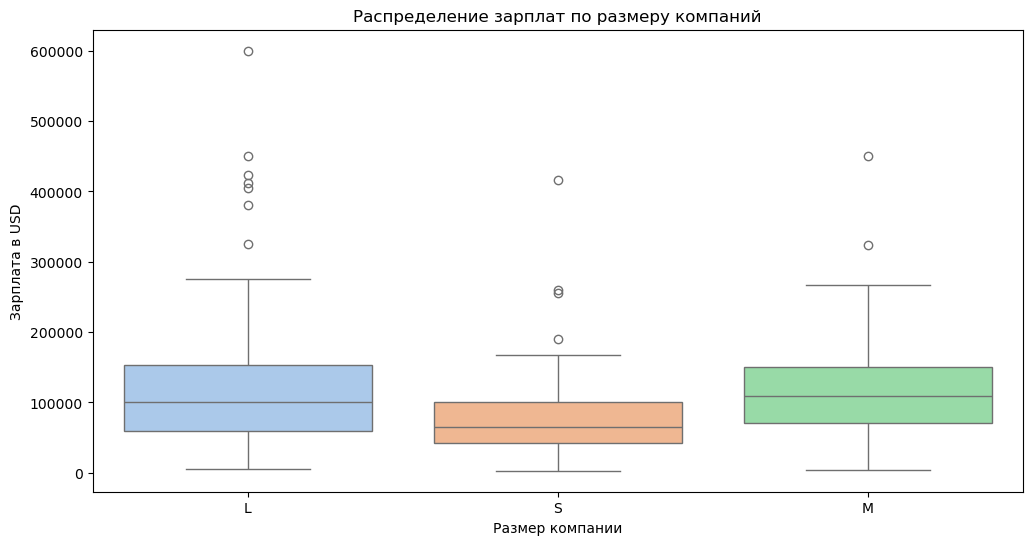

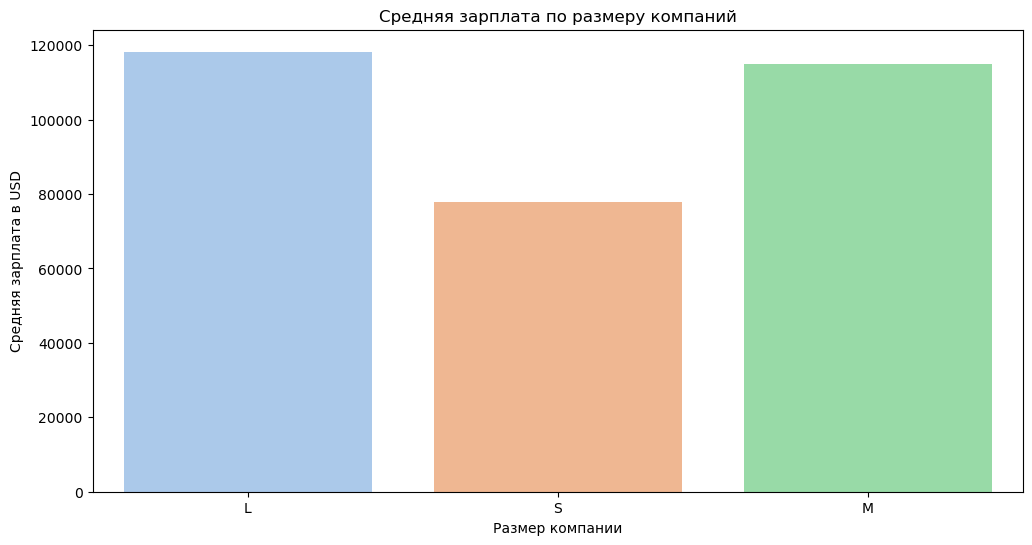

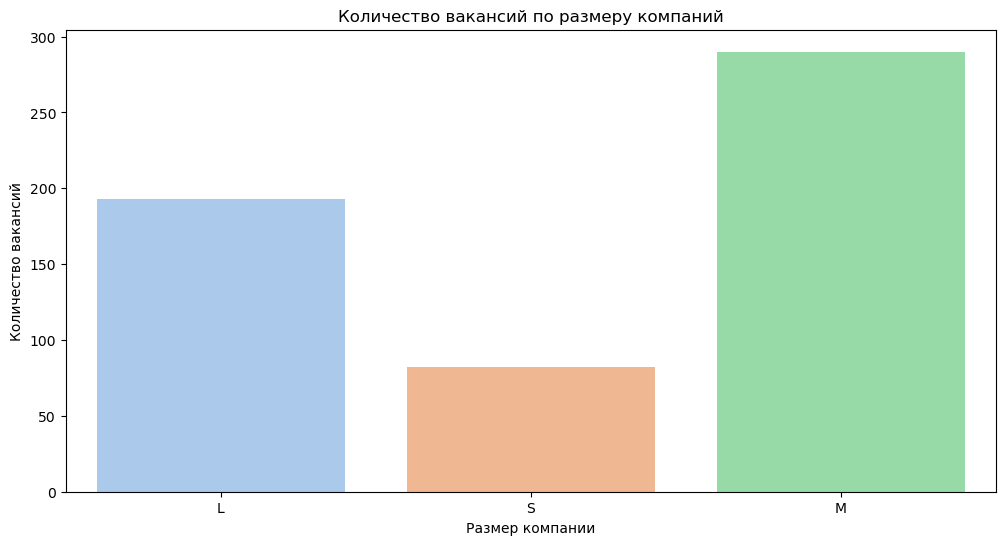

In [1201]:
# Распределение зарплат по размеру компаний
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df, hue='company_size', palette='pastel')
plt.title('Распределение зарплат по размеру компаний')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата в USD')
plt.show()

# Средняя зарплата по размеру компаний
plt.figure(figsize=(12, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=df, estimator=np.mean, errorbar=None, hue='company_size', palette='pastel')
plt.title('Средняя зарплата по размеру компаний')
plt.xlabel('Размер компании')
plt.ylabel('Средняя зарплата в USD')
plt.show()

# Количество вакансий по размеру компаний
plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', data=df, hue='company_size', palette='pastel')
plt.title('Количество вакансий по размеру компаний')
plt.xlabel('Размер компании')
plt.ylabel('Количество вакансий')
plt.show()

**Выводы:**

**График 1 - Распределение зарплат по размеру компаний**  

Зарплаты варьируются от 0 до 600,000 USD, с наибольшим разбросом для крупных компаний (L). Крупные компании предлагают более высокие зарплаты, что может быть связано с их финансовыми возможностями и масштабами проектов. Высокие зарплаты в крупных компаниях могут быть обусловлены наличием высокооплачиваемых руководящих должностей или специализированных экспертов.  

**График 2 - Средняя зарплата по размеру компаний**  

Средняя зарплата уменьшается от крупных (L) к малым (S) компаниям. Это может указывать на то, что в крупных компаниях более высокий уровень оплаты труда и больше возможностей для карьерного роста.  

**График 3 - Количество вакансий по размеру компаний**  

Наибольшее количество вакансий наблюдается в крупных компаниях (L). Это может свидетельствовать о более активном росте и расширении крупных компаний, а также о большем спросе на рабочую силу.  

**Выбросы в данных о зарплатах**, особенно в крупных компаниях, могут быть связаны с несколькими факторами:  

- Индивидуальные достижения: Некоторые сотрудники могут иметь уникальные навыки или достижения, которые приводят к значительно более высоким зарплатам.
- Рыночные условия: В определенных регионах или отраслях могут быть более высокие стандарты оплаты труда.
- Корпоративная политика: Компенсационные пакеты в крупных компаниях могут включать акции, бонусы и другие формы вознаграждения, которые увеличивают общий доход сотрудников.  

Размер компании оказывает значительное влияние на уровень зарплаты и количество вакансий. Крупные компании предлагают более высокие зарплаты и имеют больше вакансий, что может отражать их экономическую стабильность и стремление к росту. Малые компании предлагают меньше вакансий и более низкие зарплаты, что может быть связано с ограниченными ресурсами или спецификой рынка. Выбросы в данных о зарплатах требуют дополнительного анализа для понимания их причин и разработки соответствующих стратегий управления персоналом.


### **2.9 Сравнение и анализ признаков job_title, work_year, company_size, salary_in_usd, experience_level в контексте должностей Data Scientist и Data Engineer**

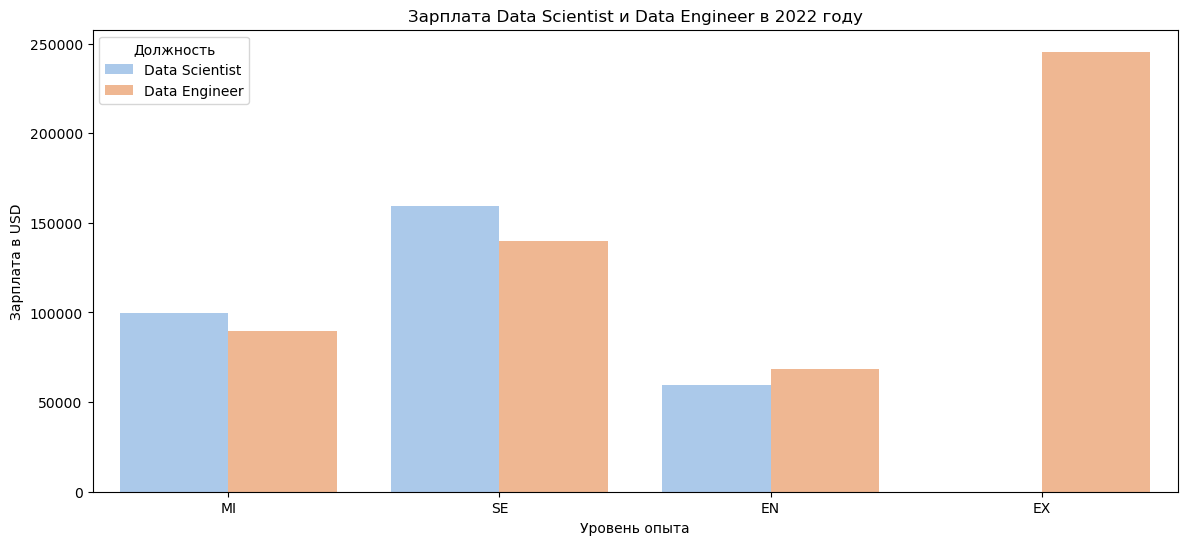

In [1202]:
# Фильтруем данные по профессии и году
ds_salaries_2022 = df[(df['job_title'] == 'Data Scientist') & (df['work_year'] == 2022)]
de_salaries_2022 = df[(df['job_title'] == 'Data Engineer') & (df['work_year'] == 2022)]

# Объединяем данные
combined_data = pd.concat([ds_salaries_2022, de_salaries_2022])

# Строим объединенный график
plt.figure(figsize=(14, 6))
sns.barplot(x='experience_level', y='salary_in_usd', hue='job_title', data=combined_data, estimator=np.mean, errorbar=None, palette='pastel')
plt.title('Зарплата Data Scientist и Data Engineer в 2022 году')
plt.xlabel('Уровень опыта')
plt.ylabel('Зарплата в USD')
plt.legend(title='Должность')
plt.show()

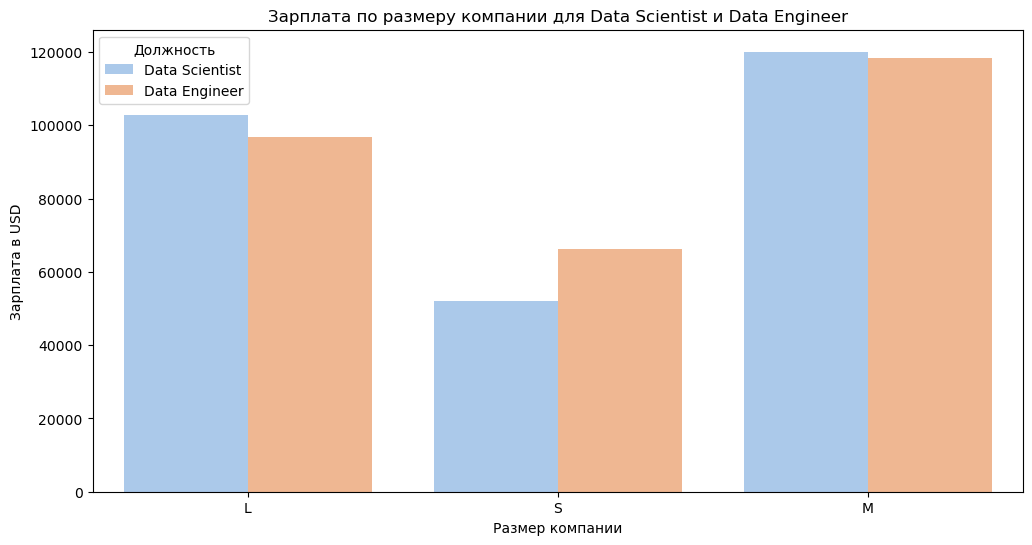

In [1203]:
# Фильтруем данные для должностей Data Scientist и Data Engineer
ds_data_all = df[df['job_title'] == 'Data Scientist']
de_data_all = df[df['job_title'] == 'Data Engineer']

# Объединяем данные
combined_data = pd.concat([ds_data_all, de_data_all])

# График средней зарплаты по размеру компании для Data Scientist и Data Engineer
plt.figure(figsize=(12, 6))
sns.barplot(x='company_size', y='salary_in_usd', hue='job_title', data=combined_data, estimator=np.mean, errorbar=None, palette='pastel')
plt.title('Зарплата по размеру компании для Data Scientist и Data Engineer')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата в USD')
plt.legend(title='Должность')
plt.show()

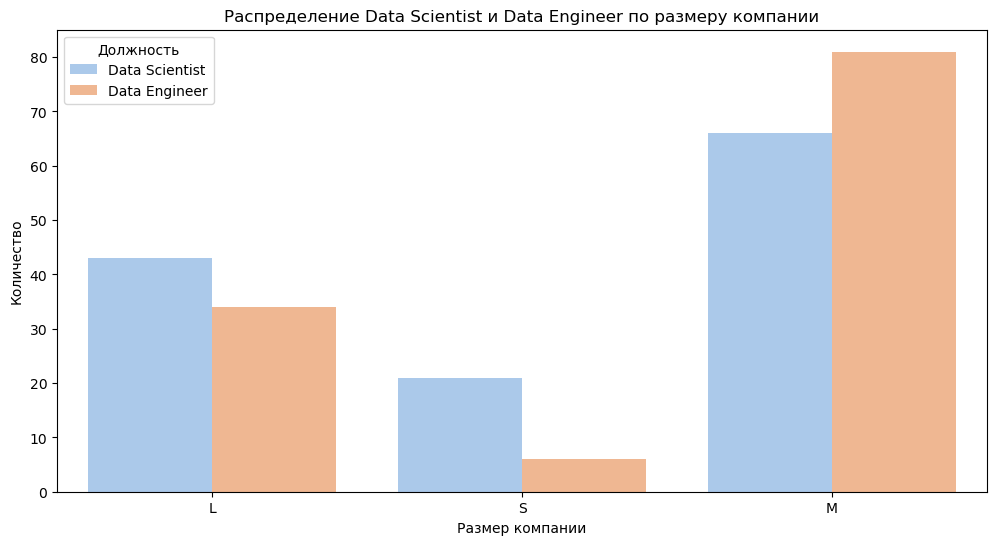

In [1204]:
# Фильтруем данные для должностей Data Scientist и Data Engineer
ds_data = df[df['job_title'] == 'Data Scientist']
de_data = df[df['job_title'] == 'Data Engineer']

# Объединяем данные
combined_data = pd.concat([ds_data, de_data])

# График распределения Data Scientist и Data Engineer по размеру компании
plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', data=combined_data, hue='job_title', palette='pastel')
plt.title('Распределение Data Scientist и Data Engineer по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Количество')
plt.legend(title='Должность')
plt.show()

**Соотношение зарплат Data Scientist и Data Engineer в 2022 году:**  

**Data Scientist**, как правило, имеют более высокую среднюю зарплату по сравнению с Data Engineers на всех уровнях опыта. Это может быть связано с различиями в специализации, уровне ответственности и спросе на эти профессии.  

**Зарплаты специалистов Data Scientist в компаниях различных размеров:**  
В крупных компаниях (L) зарплаты Data Scientists выше, чем в малых (S) и средних (M).  
Это может отражать более высокие бюджеты крупных компаний и инвестиции в привлечение топ-специалистов.  

**Связь между наличием должностей Data Scientist и Data Engineer и размером компании:**  
Крупные компании, скорее всего, имеют больше вакансий для обеих должностей, что указывает на более широкий спектр проектов и возможностей.  
Малые и средние компании могут иметь меньше вакансий из-за ограниченных ресурсов или более узкой специализации.  

**Анализ выбросов:**  
Выбросы в зарплатах могут быть связаны с уникальными навыками, достижениями или особенностями рынка труда в определенных регионах. Возможно, в крупных компаниях есть высокооплачиваемые руководящие позиции или проекты с высокими ставками, которые влияют на общее распределение зарплат.  

Зарплаты в области Data Science и Data Engineering зависят от множества факторов, включая уровень опыта, размер компании и регион. Крупные компании предлагают более высокие зарплаты и имеют больше вакансий, что может отражать их экономическую стабильность и стремление к росту. Выбросы в данных о зарплатах требуют дополнительного анализа для понимания их причин и разработки соответствующих стратегий управления персоналом.  

### **Общий вывод по визуальному анализу**

Анализ зарплат в сфере Data Science показывает, что средние зарплаты варьируются от 70,000 до 130,000 USD, с модой в 100,000 USD. Наблюдается значительный разброс зарплат, что указывает на разнообразие ролей и уровней опыта в этой области. 

**Выявлены следующие основные закономерности и гипотезы:**
- Ежегодный рост средней зарплаты, особенно для Data Scientists. Рынок труда в области Data Science демонстрирует положительную динамику с увеличением средней зарплаты и количества вакансий.
- Зарплаты Data Scientist в 2022 обычно выше, чем у Data Engineer, что может быть связано с более высоким спросом на их специализированные навыки.
- Высшие зарплаты в крупных компаниях и экономически развитых регионах.
- Зарплаты Data Scientist в крупных компаниях выше, чем в малых и средних, что отражает более крупные бюджеты и сложность проектов в больших компаниях.
- Большее количество вакансий в крупных компаниях.
- Существует связь между наличием должностей Data Scientist и Data Engineer и размером компании, с большим количеством вакансий в крупных компаниях. Это подтверждает предположение о том, что крупные компании активнее инвестируют в данные и аналитику.
- На зарплату Data Scientist влияют уровень опыта, размер компании, регион и специализация.

## **3. Статистический анализ данных**

Установим уровень значимости

In [1205]:
# Установка уровня значимости
alpha = 0.05
print(f"Уровень значимости = {alpha}")

Уровень значимости = 0.05


Создадим функции для оптимизации кода

In [1206]:
from scipy import stats

# Функция для подсчета наблюдений в каждом признаке и подгруппе
def count_observations(df, job_title):
    # Фильтрация данных для указанной должности
    df_filtered = df[df['job_title'] == job_title]
    
    # Список признаков для анализа
    variables = ['work_year', 'experience_level', 'employment_type', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
    
    # Подсчет количества наблюдений в каждой подгруппе для каждого признака
    for var in variables:
        group_counts = df_filtered[var].value_counts()
        print(f"Количество наблюдений в каждой подгруппе для {var}:\n{group_counts}\n")

# Функция для проверки нормальности распределения
def check_normality(label, data, alpha=0.05):
    # Выполнение теста Шапиро-Уилка для проверки нормальности
    stat, p_value = stats.shapiro(data)
    # Проверка p-value и вывод результата
    if p_value > alpha:
        print(f"{label}: Statistics={stat:.2f}, p-value={p_value:.18f}. P-value больше {alpha}, распределение можно считать нормальным. Принимаем нулевую гипотезу.")
    else:
        print(f"{label}: Statistics={stat:.2f}, p-value={p_value:.18f}. P-value меньше {alpha}, распределение отличается от нормального. Отвергаем нулевую гипотезу в пользу альтернативной.")
        
# Функция для проверки нулевой гипотезы с использованием теста Краскела-Уоллиса
def test_hypothesis_kruskal(data_groups, alpha=0.05):
    # Выполнение теста Краскела-Уоллиса для проверки нулевой гипотезы
    stat, p_value = stats.kruskal(*data_groups)
    # Проверка p-value и вывод результата
    if p_value > alpha:
        print(f"Statistics={stat:.2f}, p-value={p_value:.18f}. P-value больше {alpha}. Принимаем нулевую гипотезу.")
    else:
        print(f"Statistics={stat:.2f}, p-value={p_value:.18f}. P-value меньше {alpha}. Отвергаем нулевую гипотезу в пользу альтернативной.")

# Функция для выполнения корреляционного анализа
def analyze_correlations(df, job_title, target_column, method='kendall', threshold=0.2):
    # Отбор данных для указанной должности
    df_filtered = df[df['job_title'] == job_title]
    
    # Кодирование категориальных переменных с помощью порядкового кодирования
    cols_df = [x for x in df_filtered.columns if df_filtered[x].dtype == 'object']
    ord_encoder = OrdinalEncoder()
    df_ds_encoded = df_filtered.copy()
    df_ds_encoded[cols_df] = ord_encoder.fit_transform(df_filtered[cols_df])
    
    # Корреляционный анализ
    data_corr = df_ds_encoded.corr(method=method)
    
    return df_ds_encoded, ord_encoder, cols_df, data_corr

# Функция для вывода значимых корреляций
def print_significant_correlations(data_corr, job_title, target_column, threshold=0.2):
    # Вывод значимых корреляций, включая отрицательные
    significant_correlations = data_corr[target_column].drop(target_column).sort_values(key=abs, ascending=False)
    print(f'Факторы и их коэффициенты корреляции, которые влияют на {target_column} у специалистов {job_title}:')
    print(significant_correlations[abs(significant_correlations) > threshold])
    
# Функция для проверки равенства дисперсий        
def check_variances(label, data1, data2, alpha=0.05):
    # Выполнение теста Левена для проверки равенства дисперсий
    stat, p_value = stats.levene(data1, data2)
    # Проверка p-value и вывод результата
    if p_value > alpha:
        print(f"{label}: Statistics={stat:.2f}, p-value={p_value:.18f}. P-value больше {alpha}, дисперсии групп можно считать равными. Принимаем нулевую гипотезу.")
    else:
        print(f"{label}: Statistics={stat:.2f}, p-value={p_value:.18f}. P-value меньше {alpha}, дисперсии групп различаются. Отвергаем нулевую гипотезу в пользу альтернативной.")

# Функция для пост-хок анализа с использованием теста Тьюки
def perform_tukey_test(data, group_labels, alpha=0.05):
    # Выполнение теста Тьюки для пост-хок анализа
    tukey_result = pairwise_tukeyhsd(endog=data, groups=group_labels, alpha=alpha)
    # Преобразование результатов в DataFrame
    tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
    return tukey_df

# Функция для пост-хок анализа с использованием теста Games-Howell
def perform_games_howell_test(data, group_labels, alpha=0.05):
    # Выполнение теста Games-Howell для пост-хок анализа
    games_howell_result = pg.pairwise_gameshowell(data=pd.DataFrame({'data': data, 'group': group_labels}), dv='data', between='group')
    return games_howell_result

# Функция для пост-хок анализа с использованием теста Dunnett’s T3
def perform_dunnetts_t3_test(data, group_labels, alpha=0.05):
    # Создание DataFrame для анализа
    df = pd.DataFrame({'data': data, 'group': group_labels})
    # Выполнение теста Dunnett’s T3 для пост-хок анализа
    dunnetts_t3_result = sp.posthoc_dunn(df, val_col='data', group_col='group', p_adjust='bonferroni')
    return dunnetts_t3_result

# Функция для расчета VIF (фактора инфляции дисперсии)
def calculate_vif(df):
    # Добавление константы в DataFrame
    X = add_constant(df)
    # Создание DataFrame для хранения значений VIF
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    # Расчет VIF для каждой переменной
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Функция для выполнения хи-квадрат теста
def perform_chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value, contingency_table, expected

# Функция для расчета стандартизированных остатков
def calculate_standardized_residuals(contingency_table, expected):
    residuals = (contingency_table - expected) / np.sqrt(expected)
    return residuals

# Функция для сравнения пропорций с использованием Z-теста
def compare_proportions(count1, nobs1, count2, nobs2):
    stat, p_value = proportions_ztest([count1, count2], [nobs1, nobs2])
    return stat, p_value

# Функция для выполнения коррекции Бонферрони
def bonferroni_correction(p_value, num_tests, alpha=0.05):
    bonferroni_alpha = alpha / num_tests
    return p_value < bonferroni_alpha

# Функция для расчета Cramer's V
def calculate_cramers_v(chi2, n, phi2_min):
    return np.sqrt(chi2 / n / phi2_min)

# Функция для вычисления Cramer's V с учетом таблицы сопряженности и статистики хи-квадрат
def compute_cramers_v(contingency_table, chi2_stat):
    phi2_min = min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
    cramers_v_value = calculate_cramers_v(chi2_stat, contingency_table.values.sum(), phi2_min)
    return cramers_v_value

In [1207]:
# Вызов функции для подсчета наблюдений
count_observations(df, 'Data Scientist')

Количество наблюдений в каждой подгруппе для work_year:
work_year
2022    65
2021    44
2020    21
Name: count, dtype: int64

Количество наблюдений в каждой подгруппе для experience_level:
experience_level
MI    59
SE    49
EN    22
Name: count, dtype: int64

Количество наблюдений в каждой подгруппе для employment_type:
employment_type
FT    127
PT      2
FL      1
Name: count, dtype: int64

Количество наблюдений в каждой подгруппе для employee_residence:
employee_residence
US    66
GB    11
IN     9
FR     8
DE     6
CA     6
ES     3
BR     2
RU     1
AU     1
JP     1
PL     1
DZ     1
TR     1
RS     1
VN     1
UA     1
CL     1
MX     1
SG     1
HU     1
NG     1
AT     1
IT     1
PH     1
GR     1
CH     1
Name: count, dtype: int64

Количество наблюдений в каждой подгруппе для remote_ratio:
remote_ratio
100    68
0      38
50     24
Name: count, dtype: int64

Количество наблюдений в каждой подгруппе для company_location:
company_location
US    72
GB    11
IN     8
FR     7
DE    

В связи с ограниченным числом наблюдений в ряде подгрупп наших признаков, напишем рекомендации для тестов на их применение для каждого признака:

**Тест Dunnett’s T3:** Рекомендуется для признаков **employment_type**, **employee_residence**, и **company_location** из-за недостаточного количества наблюдений в некоторых группах.  
**Тест Games-Howell:** Рекомендуется для признаков **work_year**, **experience_level**, **remote_ratio**, и **company_size**, так как все группы имеют достаточное количество наблюдений.  


Преимущества обоих этих тестов - не требуют нормальности распределений и подходят для неравных дисперсий.

### **3.1 Вопрос №1 - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**

**Проверка на нормальность распределения:**

**Нулевая гипотеза (H0):** Распределение зарплат у специалистов Data Scientist в данном году является нормальным.  
**Альтернативная гипотеза (H1):** Распределение зарплат у специалистов Data Scientist в данном году не является нормальным.

Проведем проверку на нормальность распределения зарплат для каждого года. Важно отметить, что тест Шапиро-Уилка является одним из наиболее мощных тестов для проверки нормальности распределения, особенно для небольших выборок данных. Однако, если размер выборки превышает 5000 наблюдений, тест может стать менее чувствительным. В нашем случае, учитывая, что размер выборки меньше 5000, тест Шапиро-Уилка подходит для наших целей.

In [1208]:
# Фильтрация данных для специалистов Data Scientist
df_ds = df[df['job_title'] == 'Data Scientist']

# Подготовка данных для анализа
data_2020 = df_ds[df_ds['work_year'] == 2020]['salary_in_usd']
data_2021 = df_ds[df_ds['work_year'] == 2021]['salary_in_usd']
data_2022 = df_ds[df_ds['work_year'] == 2022]['salary_in_usd']

# Проверка на нормальность
normality_2020 = check_normality(2020, data_2020)
normality_2021 = check_normality(2021, data_2021)
normality_2022 = check_normality(2022, data_2022)

2020: Statistics=0.59, p-value=0.000001717291638334. P-value меньше 0.05, распределение отличается от нормального. Отвергаем нулевую гипотезу в пользу альтернативной.
2021: Statistics=0.96, p-value=0.107240986916494696. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.
2022: Statistics=0.99, p-value=0.676181234197021697. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.


**Проверка равенства дисперсий:**

**Нулевая гипотеза (H0):** Дисперсии зарплат за 2020, 2021 и 2022 годы равны.  
**Альтернативная гипотеза (H1):** Дисперсии зарплат за 2020, 2021 и 2022 годы различаются.  

Воспользуемся Тестом Левена для проверки равенства дисперсий. Тест Левина является достаточно устойчивым к отклонениям от нормальности и предназначен для проверки равенства дисперсий между группами.

In [1209]:
# Подготовка данных для анализа
data_2020 = df_ds[df_ds['work_year'] == 2020]['salary_in_usd']
data_2021 = df_ds[df_ds['work_year'] == 2021]['salary_in_usd']
data_2022 = df_ds[df_ds['work_year'] == 2022]['salary_in_usd']

# Проверка равенства дисперсий между группами
check_variances('2020 vs 2021', data_2020, data_2021)
check_variances('2020 vs 2022', data_2020, data_2022)
check_variances('2021 vs 2022', data_2021, data_2022)

2020 vs 2021: Statistics=0.08, p-value=0.772932237606241079. P-value больше 0.05, дисперсии групп можно считать равными. Принимаем нулевую гипотезу.
2020 vs 2022: Statistics=0.07, p-value=0.798298718164674015. P-value больше 0.05, дисперсии групп можно считать равными. Принимаем нулевую гипотезу.
2021 vs 2022: Statistics=1.26, p-value=0.263857884478352012. P-value больше 0.05, дисперсии групп можно считать равными. Принимаем нулевую гипотезу.


**Воспользуемся тестом Краскела-Уоллиса для анализа изменения зарплат:**

Поскольку распределение зарплат за 2020 год не является нормальным, использование непараметрического теста, такого как тест Краскела-Уоллиса, является оправданным.
Даже если распределения за 2021 и 2022 годы нормальные, тест Краскела-Уоллиса все равно можно использовать, так как он подходит и для смешанных данных.

**Нулевая гипотеза (H0):** Медианные зарплаты Data Scientist не изменились с 2020 по 2022 год.  
**Альтернативная гипотеза (H1):** Медианные зарплаты Data Scientist изменились с 2020 по 2022 год.  

In [1210]:
# Тест Краскела-Уоллиса
test_hypothesis_kruskal([data_2020, data_2021, data_2022])


Statistics=33.06, p-value=0.000000066245683885. P-value меньше 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Пост-хок анализа с использованием теста Тьюки:**

Тест Краскела-Уоллиса указывает на наличие различий, но не показывает, между какими конкретно группами (годами) эти различия существуют.  Пост-хок анализ, такой как тест Тьюки, помогает определить, между какими именно группами существуют значимые различия. Тест Тьюки является мощным инструментом для множественных сравнений и может использоваться после непараметрических тестов, таких как тест Краскела-Уоллиса. Он корректирует уровень значимости для множественных сравнений, что помогает избежать ложноположительных результатов. Критерием его применения является равенство дисперсий, что подтверждено ранее. 

Результаты пост-хок анализа с использованием теста Тьюки представлены в таблице, где каждый столбец имеет следующее значение:

**group1 и group2:** Это группы, между которыми проводится сравнение. В вашем случае это годы, за которые сравниваются зарплаты Data Scientist.  
**meandiff:** Средняя разница в зарплатах между группами. Положительное значение указывает на то, что средняя зарплата в group2 выше, чем в group1.  
**p-adj:** Скорректированное p-value, которое учитывает множественные сравнения. Это значение используется для определения статистической значимости различий между группами.  
**lower и upper:** Нижняя и верхняя границы 95% доверительного интервала для средней разницы. Если этот интервал не включает ноль, различия считаются статистически значимыми.  
**reject:** Булево значение, указывающее, следует ли отвергнуть нулевую гипотезу о равенстве средних. Если True, различия статистически значимы; если False, значимых различий нет.  

In [1211]:
# Пост-хок анализ с использованием теста Тьюки
tukey_df = perform_tukey_test(df_ds['salary_in_usd'], df_ds['work_year'], alpha=0.05)
print(tukey_df)

   group1  group2    meandiff   p-adj       lower       upper  reject
0    2020    2021 -15754.7511  0.5592 -52020.0340  20510.5319   False
1    2020    2022  45396.4147  0.0060  11075.9406  79716.8887    True
2    2021    2022  61151.1657  0.0000  34457.9676  87844.3639    True


**Сравнение между 2020 и 2021 годами** показывает, что средняя разница в зарплатах составляет -15754.7511 USD, но с p-value 0.5592, что значительно выше уровня значимости 0.05. Это означает, что различия в зарплатах между этими двумя годами не являются статистически значимыми, и мы не отвергаем нулевую гипотезу о равенстве средних.

**Сравнение между 2020 и 2022 годами** показывает среднюю разницу в зарплатах 45396.4147 USD с p-value 0.0060. Поскольку это значение меньше 0.05, различия в зарплатах между этими годами статистически значимы, и мы отвергаем нулевую гипотезу о равенстве средних.

**Сравнение между 2021 и 2022 годами** также показывает статистически значимую разницу в средних зарплатах 61151.1657 USD с p-value 0.0000, что намного меньше 0.05. Это подтверждает, что зарплаты в эти годы статистически значительно различаются.  

### **Ответ:** 
Наблюдается ежегодный рост зарплат у специалистов Data Scientist, отдельно стоить заметить, что зарплаты Data Scientist значительно выросли с 2020 по 2022 год и с 2021 по 2022 год, но не было значимого изменения между 2020 и 2021 годами. Это указывает на то, что какой-то фактор или событие, возможно, повлияло на рост зарплат после 2021 года.

**Примечание:**  

**P-value в тесте Краскела-Уоллиса** и **скорректированное p-value (p-adj)** в пост-хок анализе с использованием теста Тьюки отличаются по своему предназначению и способу расчета:  

**P-value** в тесте Краскела-Уоллиса указывает на вероятность получить такие или более экстремальные результаты, если бы нулевая гипотеза (о том, что все группы имеют одинаковые медианные значения) была верна. Это единичное значение p-value, полученное из одного теста, который сравнивает все группы одновременно. В нашем случае, p-value=0.00000000291259553 говорит о том, что есть статистически значимые различия между хотя бы двумя группами из тех, что сравниваются.

**P-adj** в пост-хок анализе с использованием теста Тьюки — это скорректированное p-value, которое учитывает множественные сравнения между различными парами групп. Поскольку в пост-хок анализе проводится несколько парных сравнений, существует риск получения ложноположительных результатов из-за множественных тестирований. P-adj корректирует это, контролируя общую ошибку первого рода (FWER - Familywise Error Rate), чтобы уменьшить вероятность ложноположительных результатов. В нашем случае, p-adj используется для каждого индивидуального сравнения между годами, чтобы определить, между какими конкретными годами существуют значимые различия.  

Таким образом, основное отличие заключается в том, что p-value в тесте Краскела-Уоллиса дает общую оценку различий между всеми группами, в то время как p-adj в тесте Тьюки корректируется для каждого отдельного сравнения между парами групп, чтобы учесть множественные сравнения.  

### **3.2 Вопрос №2 - Какие факторы влияют на зарплату у специалистов Data Scientist?**

**Проведем корреляционный анализ признаков:**

In [1212]:
# Выполнение корреляционного анализа
df_ds_encoded, ord_encoder, cols_df, data_corr = analyze_correlations(df, 'Data Scientist', 'salary_in_usd')

# Вывод значимых корреляций
print_significant_correlations(data_corr, 'Data Scientist', 'salary_in_usd')

Факторы и их коэффициенты корреляции, которые влияют на salary_in_usd у специалистов Data Scientist:
experience_level      0.484706
employee_residence    0.397024
company_location      0.394188
work_year             0.364126
Name: salary_in_usd, dtype: float64


In [1213]:
# Извлечение столбца 'salary_in_usd' из корреляционной матрицы data_corr
data_corr['salary_in_usd']

work_year             0.364126
experience_level      0.484706
employment_type      -0.061500
job_title                  NaN
salary_in_usd         1.000000
employee_residence    0.397024
remote_ratio          0.114137
company_location      0.394188
company_size         -0.112314
Name: salary_in_usd, dtype: float64

Корреляционный анализ демонстрирует, что признаки experience_level, employee_residence, company_location и work_year являются значимыми факторами, влияющими на зарплату специалистов Data Scientist. Эти переменные имеют коэффициенты корреляции выше порогового значения (0.2).

**Тест Games-Howell** — это статистический пост-хок тест, который используется для сравнения средних значений между несколькими группами, когда дисперсии этих групп не равны и/или выборки имеют разный размер. Этот тест является вариантом теста Тьюки, но более гибким, поскольку учитывает возможные различия в дисперсиях между группами.

Описание столбцов теста Games-Howell:  

**A:** Первая группа, которую мы сравниваем (например, 2020 год).  
**B:** Вторая группа, которую мы сравниваем (например, 2021 год).  

**mean(A):** Среднее значение для группы A (например, средняя зарплата в 2020 году).  
**mean(B):** Среднее значение для группы B (например, средняя зарплата в 2021 году).  

**diff:** Разница между средними значениями двух групп (mean(A) - mean(B)). Это значение показывает, насколько средняя зарплата в группе A отличается от средней зарплаты в группе B.  

**se:** Стандартная ошибка разницы средних (Standard Error). Это мера того, насколько точно оценена разница между средними значениями. Меньшее значение SE указывает на более точную оценку.  

**T:** Статистика теста (T-statistic). Это значение отражает, насколько разница между группами значима в терминах стандартных отклонений. Большие абсолютные значения T указывают на более значительные различия между группами.  
- Высокое значение: T > 2 или T < -2. Указывает на значительное различие между группами.  
- Низкое значение: -1 < T < 1. Указывает на незначительное различие между группами.  

**df:** Степени свободы (Degrees of Freedom). Это значение указывает на количество информации, доступной для оценки разницы между группами. Чем больше степеней свободы, тем более надежной считается оценка.  
- Большое значение: df > 50. Указывает на большую надежность оценки.  
- Умеренное значение: 20 < df < 50. Это указывает на то, что анализ основан на средних размерах выборок и/или умеренных дисперсиях. В этом диапазоне результаты теста могут считаться достаточно надежными, хотя они не будут столь надежными, как при df > 50.
- Малое значение: df < 20. Указывает на меньшую надежность оценки.  

**pval:** P-значение (p-value). Это значение показывает вероятность того, что наблюдаемая разница между группами произошла случайно. Меньшее значение p-значения указывает на более значительное отличие между группами. Обычно значение меньше 0.05 считается статистически значимым.  

**hedges:** Коэффициент Хеджеса (Hedges' g). Это мера размера эффекта, которая учитывает размер выборки. Положительное значение указывает, что группа A имеет более высокое значение, чем группа B, и наоборот. Чем больше значение, тем значительнее эффект.  
- Большой эффект: hedges > 0.8 или hedges < -0.8.  
- Средний эффект: 0.5 < |hedges| < 0.8.  
- Малый эффект: 0.2 < |hedges| < 0.5.  
- Очень малый эффект: |hedges| < 0.2.  

**Выполним тест Games-Howell для уточнения результатов корреляционного анализа для признаков с достаточным количеством наблюдений:**

In [1214]:
# Использование функции analyze_correlations для фильтрации данных и кодирования
df_ds_encoded, ord_encoder, cols_df, data_corr = analyze_correlations(df, 'Data Scientist', 'salary_in_usd')

# Список переменных для пост-хок анализа
variables = ['work_year', 'experience_level', 'remote_ratio', 'company_size']

# Словарь для хранения соответствия между закодированными значениями и исходными категориями
category_mappings = {var: list(ord_encoder.categories_[i]) for i, var in enumerate(cols_df)}

# Проведение пост-хок анализа для каждой переменной
for var in variables:
    games_howell_df = perform_games_howell_test(data=df_ds_encoded['salary_in_usd'], group_labels=df_ds_encoded[var], alpha=0.05)
    
    # Замена закодированных значений на исходные текстовые метки
    if var in category_mappings:
        games_howell_df['A'] = games_howell_df['A'].map(lambda x: category_mappings[var][int(x)])
        games_howell_df['B'] = games_howell_df['B'].map(lambda x: category_mappings[var][int(x)])
    
    print(f'Тест Games-Howell для {var}:')
    print(games_howell_df.to_string(index=False))
    print("\n")

Тест Games-Howell для work_year:
   A    B      mean(A)       mean(B)          diff           se         T         df         pval    hedges
2020 2021 85970.523810  70215.772727  15754.751082 19067.537291  0.826260  26.228351 6.903558e-01  0.261636
2020 2022 85970.523810 131366.938462 -45396.414652 19070.472055 -2.380456  26.334600 6.211555e-02 -0.715834
2021 2022 70215.772727 131366.938462 -61151.165734  9779.658265 -6.252894 102.925643 2.780489e-08 -1.167297


Тест Games-Howell для experience_level:
 A  B      mean(A)       mean(B)          diff           se         T        df         pval    hedges
EN MI 55330.909091  81891.762712 -26560.853621  9066.823098 -2.929455 57.084597 1.331536e-02 -0.603698
EN SE 55330.909091 150710.857143 -95379.948052 11186.845528 -8.526081 68.192316 7.149725e-12 -1.707967
MI SE 81891.762712 150710.857143 -68819.094431 10892.362292 -6.318106 87.600949 3.200088e-08 -1.244515


Тест Games-Howell для remote_ratio:
 A   B      mean(A)       mean(B)          

**Выводы:**  

**work_year:**  

**2020 vs 2021:** Средняя зарплата в 2020 году была выше на $15,754.75, но эта разница не является статистически значимой (p-value = 0.690). Стандартная ошибка (se) = 19,067.54 указывает на высокую неопределенность оценки. Статистика теста (T) = 0.826 и степени свободы (df) = 26.23 показывают, что разница незначительна. Коэффициент Хеджеса (hedges) = 0.26 указывает на малый эффект.  
**2020 vs 2022:** Средняя зарплата в 2022 году была значительно выше на $45,396.41. Эта разница не является статистически значимой при уровне значимости 0.05 (p-value = 0.062). Стандартная ошибка (se) = 19,070.47 указывает на высокую неопределенность оценки. Статистика теста (T) = -2.38 и степени свободы (df) = 26.33 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = -0.72 указывает на средний эффект.   
**2021 vs 2022:** Средняя зарплата в 2022 году была значительно выше на $61,151.17, и эта разница является статистически значимой (p-value < 0.0001). Стандартная ошибка (se) = 9,779.66 указывает на более точную оценку. Статистика теста (T) = -6.25 и степени свободы (df) = 102.93 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = -1.17 указывает на большой эффект.  

**experience_level:**  

**EN vs MI:** Средняя зарплата для уровня EN была ниже на $26,560.85 по сравнению с MI, и эта разница является статистически значимой (p-value = 0.013). Стандартная ошибка (se) = 9,066.82 указывает на умеренную неопределенность оценки. Статистика теста (T) = -2.93 и степени свободы (df) = 57.08 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = -0.60 указывает на средний эффект.  
**EN vs SE:** Средняя зарплата для уровня EN была значительно ниже на $95,379.95 по сравнению с SE, и эта разница является статистически значимой (p-value < 0.0001). Стандартная ошибка (se) = 11,186.85 указывает на высокую неопределенность оценки. Статистика теста (T) = -8.53 и степени свободы (df) = 68.19 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = -1.71 указывает на большой эффект.  
**MI vs SE:** Средняя зарплата для уровня MI была ниже на $68,819.09 по сравнению с SE, и эта разница является статистически значимой (p-value < 0.0001). Стандартная ошибка (se) = 10,892.36 указывает на высокую неопределенность оценки. Статистика теста (T) = -6.32 и степени свободы (df) = 87.60 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = -1.24 указывает на большой эффект.  

**remote_ratio:**  

**0 vs 50:** Средняя зарплата для полностью удаленной работы (0) была выше на $24,617.14 по сравнению с частично удаленной (50), но эта разница не является статистически значимой (p-value = 0.111). Стандартная ошибка (se) = 12,046.93 указывает на высокую неопределенность оценки. Статистика теста (T) = 2.04 и степени свободы (df) = 59.99 показывают, что разница незначительна. Коэффициент Хеджеса (hedges) = 0.47 указывает на средний эффект.  
**0 vs 100:** Средняя зарплата для полностью удаленной работы (0) была ниже на $18,039.57 по сравнению с полностью офисной (100), но эта разница не является статистически значимой (p-value = 0.342). Стандартная ошибка (se) = 12,824.01 указывает на высокую неопределенность оценки. Статистика теста (T) = -1.41 и степени свободы (df) = 89.25 показывают, что разница незначительна. Коэффициент Хеджеса (hedges) = -0.27 указывает на малый эффект.  
**50 vs 100:** Средняя зарплата для частично удаленной работы (50) была ниже на $42,656.71 по сравнению с полностью офисной (100), и эта разница является статистически значимой (p-value = 0.001). Стандартная ошибка (se) = 11,338.23 указывает на умеренную неопределенность оценки. Статистика теста (T) = -3.76 и степени свободы (df) = 78.22 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = -0.66 указывает на средний эффект.  

**company_size:**  
**L vs M:** Средняя зарплата в крупных компаниях (L) была ниже на $17,337.16 по сравнению с средними (M), но эта разница не является статистически значимой (p-value = 0.390). Стандартная ошибка (se) = 13,149.21 указывает на высокую неопределенность оценки. Статистика теста (T) = -1.32 и степени свободы (df) = 73.56 показывают, что разница незначительна. Коэффициент Хеджеса (hedges) = -0.27 указывает на малый эффект.  
**L vs S:** Средняя зарплата в крупных компаниях (L) была выше на $50,817.66 по сравнению с малыми (S), и эта разница является статистически значимой (p-value = 0.001). Стандартная ошибка (se) = 13,316.67 указывает на высокую неопределенность оценки. Статистика теста (T) = 3.82 и степени свободы (df) = 61.80 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = 0.79 указывает на средний эффект.  
**M vs S:** Средняя зарплата в средних компаниях (M) была выше на $68,154.81 по сравнению с малыми (S), и эта разница является статистически значимой (p-value < 0.0001). Стандартная ошибка (se) = 10,032.26 указывает на умеренную неопределенность оценки. Статистика теста (T) = 6.79 и степени свободы (df) = 58.34 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = 1.30 указывает на большой эффект.  

Значимые различия в зарплатах наблюдаются между годами (особенно между 2021 и 2022), уровнями опыта (EN, MI, SE), и типами удаленной работы (50% и 100%).  
Размер компании также влияет на зарплату, причем средние и крупные компании предлагают более высокие зарплаты по сравнению с малыми.  

**Тест Dunnett’s T3** — это статистический метод, используемый для выполнения множественных сравнений средних значений групп, особенно в ситуациях, когда предположение о равенстве дисперсий нарушено. Этот тест является непараметрическим аналогом теста Тьюки и применяется, когда данные имеют неоднородные дисперсии или когда размеры выборок существенно различаются.

**Выполним тест Dunnett’s T3 для уточнения результатов корреляционного анализа для признаков с недостаточным количеством наблюдений:**

In [1215]:
# Использование функции analyze_correlations для фильтрации данных и кодирования
df_ds_encoded, ord_encoder, cols_df, data_corr = analyze_correlations(df, 'Data Scientist', 'salary_in_usd')

# Список переменных для пост-хок анализа
variables = ['employment_type', 'employee_residence', 'company_location']

# Словарь для хранения соответствия между закодированными значениями и исходными категориями
category_mappings = {var: list(ord_encoder.categories_[i]) for i, var in enumerate(cols_df)}

# Проведение пост-хок анализа для каждой переменной
for var in variables:
    dunnetts_t3_df = perform_dunnetts_t3_test(data=df_ds_encoded['salary_in_usd'], group_labels=df_ds_encoded[var], alpha=0.05)
    
    # Замена закодированных значений на исходные текстовые метки
    if var in category_mappings:
        dunnetts_t3_df.index = dunnetts_t3_df.index.map(lambda x: category_mappings[var][int(x)])
        dunnetts_t3_df.columns = dunnetts_t3_df.columns.map(lambda x: category_mappings[var][int(x)])
    
    print(f'Тест Dunnett’s T3 для {var}:')
    # Фильтрация результатов, где pval не равен NaN
    dunnetts_t3_df_filtered = dunnetts_t3_df.dropna(how='all')
    if not dunnetts_t3_df_filtered.empty:
        # Вывод отфильтрованных результатов
        print(dunnetts_t3_df_filtered.to_string())
    print("\n")

Тест Dunnett’s T3 для employment_type:
     FL        FT        PT
FL  1.0  1.000000  1.000000
FT  1.0  1.000000  0.921531
PT  1.0  0.921531  1.000000


Тест Dunnett’s T3 для employee_residence:
     AT   AU   BR   CA   CH   CL   DE   DZ        ES        FR   GB   GR   HU            IN   IT   JP   MX   NG   PH   PL   RS   RU   SG   TR   UA            US   VN
AT  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.000000  1.0  1.0  1.0  1.000000e+00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000e+00  1.0
AU  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.000000  1.0  1.0  1.0  1.000000e+00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000e+00  1.0
BR  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.000000  1.0  1.0  1.0  1.000000e+00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000e+00  1.0
CA  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.000000  1.000000  1.0  1.0  1.0  1.000000e+00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

Интерпретация матрицы p-значений (матрица парных сравнений):  

Таблица показывает p-значения для каждого парного сравнения между категориями переменной.  

Каждая ячейка в таблице представляет p-значение для сравнения двух групп. Например, ячейка на пересечении строки "FT" и столбца "PT" показывает p-значение для сравнения полной занятости (FT) с частичной занятостью (PT).  

P-значение (p-value):  
Если p-значение меньше уровня значимости (обычно 0.05), это означает, что различия между средними значениями зарплат в двух группах являются статистически значимыми.
Если p-значение больше уровня значимости, это означает, что статистически значимых различий между средними значениями зарплат в двух группах нет.  

**Выводы:**  

**employment_type:**
Все сравнения между типами трудоустройства (FL, FT, PT) не показали статистически значимых различий в зарплатах. Это может указывать на то, что тип трудоустройства не оказывает значительного влияния на зарплату Data Scientist.  

**employee_residence:**  
Большинство сравнений между странами проживания сотрудников не показали статистически значимых различий в зарплатах. Однако, зарплаты в США значительно отличаются от зарплат во Франции и Индии, что может указывать на влияние географического расположения на уровень зарплат.  

**company_location:**  
Большинство сравнений между странами расположения компаний не показали статистически значимых различий в зарплатах. Однако, зарплаты в США значительно отличаются от зарплат в Германии, Испании, Франции и Индии, что может указывать на влияние местоположения компании на уровень зарплат.  

Для проверки мультиколлинеарности мы можем использовать анализ дисперсии инфляции факторов (VIF), который поможет определить степень корреляции между независимыми переменными в регрессионной модели. 

In [1216]:
# Удаление столбца 'salary_in_usd' перед передачей данных в функцию calculate_vif
df_for_vif = df_ds_encoded.drop(['salary_in_usd'], axis=1)

# Вызов функции для расчета VIF
vif_data = calculate_vif(df_for_vif)

# Вывод результатов
print(vif_data)

              feature           VIF
0               const  9.141421e+06
1           work_year  1.224353e+00
2    experience_level  1.278908e+00
3     employment_type  1.126605e+00
4           job_title           NaN
5  employee_residence  5.832284e+00
6        remote_ratio  1.054485e+00
7    company_location  5.962468e+00
8        company_size  1.035277e+00


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Исходя из результатов анализа дисперсии инфляции факторов (VIF), большинство переменных имеют значения VIF ниже 5, что указывает на отсутствие серьезной мультиколлинеарности. Однако переменные employee_residence и company_location имеют значения VIF, близкие к 6, что может свидетельствовать о некоторой мультиколлинеарности. Это не является критически высоким значением, но стоит учитывать при интерпретации результатов модели.

### **Ответ:**   
Наиболее значимыми факторами, влияющими на зарплату специалистов Data Scientist, являются уровень опыта **experience_level**, место жительства сотрудника **employee_residence**, местоположение компании **company_location** и год работы **work_year**.  

### **3.3 Вопрос №3 - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**

**Проверка на нормальность распределения:**

**Нулевая гипотеза (H0):** Средние зарплаты специалистов Data Scientist не различаются в компаниях различных размеров.

**Альтернативная гипотеза (H1):** Существует хотя бы одна пара групп, в которых средние зарплаты специалистов Data Scientist статистически значимо различаются.

In [1217]:
# Фильтрация данных для специалистов Data Scientist
data_scientists = df[df['job_title'] == 'Data Scientist']

# Подготовка данных для анализа
data_small = data_scientists[data_scientists['company_size'] == 'S']['salary_in_usd']
data_medium = data_scientists[data_scientists['company_size'] == 'M']['salary_in_usd']
data_large = data_scientists[data_scientists['company_size'] == 'L']['salary_in_usd']

# Этап 1: Проверка на нормальность
normality_small = check_normality('Small', data_small)
normality_medium = check_normality('Medium', data_medium)
normality_large = check_normality('Large', data_large)


Small: Statistics=0.94, p-value=0.189028025063010863. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.
Medium: Statistics=0.99, p-value=0.896507235431620031. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.
Large: Statistics=0.84, p-value=0.000038677400886092. P-value меньше 0.05, распределение отличается от нормального. Отвергаем нулевую гипотезу в пользу альтернативной.


**Проверка равенства дисперсий**

Для проверки равенства дисперсий зарплат специалистов Data Scientist в компаниях различных размеров, можно использовать тест Левена. Тест Левена используется для проверки гипотезы о равенстве дисперсий (вариаций) между двумя или более группами. Тест Левина является достаточно устойчивым к отклонениям от нормальности, что делает его подходящим для наших данных, даже если одно из распределений не является нормальным.

**Нулевая гипотеза (H0):** Дисперсии зарплат специалистов Data Scientist равны в компаниях различных размеров. Это предполагает, что нет статистически значимых различий в изменчивости зарплат между малыми, средними и крупными компаниями. 

**Альтернативная гипотеза (H1):** Дисперсии зарплат специалистов Data Scientist не равны хотя бы в одной из групп компаний определенного размера. Это означает, что существуют статистически значимые различия в изменчивости зарплат между малыми, средними или крупными компаниями.

In [1218]:
# Фильтрация данных для специалистов Data Scientist в компаниях различного размера
ds_small = df[(df['job_title'] == 'Data Scientist') & (df['company_size'] == 'S')]['salary_in_usd']
ds_medium = df[(df['job_title'] == 'Data Scientist') & (df['company_size'] == 'M')]['salary_in_usd']
ds_large = df[(df['job_title'] == 'Data Scientist') & (df['company_size'] == 'L')]['salary_in_usd']

# Выполнение теста Левена для проверки равенства дисперсий с использованием функции check_variances
check_variances('Малые vs Средние компании', ds_small, ds_medium)
check_variances('Малые vs Крупные компании', ds_small, ds_large)
check_variances('Средние vs Крупные компании', ds_medium, ds_large)

Малые vs Средние компании: Statistics=5.81, p-value=0.018119741686887063. P-value меньше 0.05, дисперсии групп различаются. Отвергаем нулевую гипотезу в пользу альтернативной.
Малые vs Крупные компании: Statistics=5.03, p-value=0.028550609659232149. P-value меньше 0.05, дисперсии групп различаются. Отвергаем нулевую гипотезу в пользу альтернативной.
Средние vs Крупные компании: Statistics=0.94, p-value=0.334421403916679960. P-value больше 0.05, дисперсии групп можно считать равными. Принимаем нулевую гипотезу.


Результаты теста Тьюки могут быть некорректными из-за неравенства дисперсий, поэтому рассмотрим использование альтернативных методов, таких как тест Games-Howell.

**Выполним тест Games-Howell для признаков с достаточным количеством наблюдений:**

In [1219]:
# Использование функции analyze_correlations для фильтрации данных и кодирования
df_ds_encoded, ord_encoder, cols_df, data_corr = analyze_correlations(df, 'Data Scientist', 'salary_in_usd')

# Переменная для пост-хок анализа
variable = 'company_size'

# Словарь для хранения соответствия между закодированными значениями и исходными категориями
category_mappings = {var: list(ord_encoder.categories_[i]) for i, var in enumerate(cols_df)}

# Проведение пост-хок анализа для переменной 'company_size'
games_howell_df = perform_games_howell_test(data=df_ds_encoded['salary_in_usd'], group_labels=df_ds_encoded[variable], alpha=0.05)

# Замена закодированных значений на исходные текстовые метки
if variable in category_mappings:
    games_howell_df['A'] = games_howell_df['A'].map(lambda x: category_mappings[variable][int(x)])
    games_howell_df['B'] = games_howell_df['B'].map(lambda x: category_mappings[variable][int(x)])

# Вывод результатов
print(f'Тест Games-Howell для {variable}:')
print(games_howell_df.to_string(index=False))

Тест Games-Howell для company_size:
A B       mean(A)       mean(B)          diff           se         T        df         pval    hedges
L M 102743.418605 120080.575758 -17337.157153 13149.207193 -1.318494 73.559379 3.895313e-01 -0.271011
L S 102743.418605  51925.761905  50817.656700 13316.666994  3.816094 61.804255 9.110034e-04  0.794628
M S 120080.575758  51925.761905  68154.813853 10032.263250  6.793563 58.343069 1.895622e-08  1.303028


**Выводы:**

**Крупные vs средние компании (L vs M):** Средняя зарплата в крупных компаниях (L) была ниже на $17,337.16 по сравнению с средними (M), но эта разница не является статистически значимой (p-value = 0.390). Стандартная ошибка (se) = 13,149.21 указывает на высокую неопределенность оценки. Статистика теста (T) = -1.32 и степени свободы (df) = 73.56 показывают, что разница незначительна. Коэффициент Хеджеса (hedges) = -0.27 указывает на малый эффект.  

**Крупные vs малые компании (L vs S):** Средняя зарплата в крупных компаниях (L) была выше на $50,817.66 по сравнению с малыми (S), и эта разница является статистически значимой (p-value = 0.001). Стандартная ошибка (se) = 13,316.67 указывает на высокую неопределенность оценки. Статистика теста (T) = 3.82 и степени свободы (df) = 61.80 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = 0.79 указывает на средний эффект.  

**Средние vs малые компании (M vs S):** Средняя зарплата в средних компаниях (M) была выше на $68,154.81 по сравнению с малыми (S), и эта разница является статистически значимой (p-value < 0.0001). Стандартная ошибка (se) = 10,032.26 указывает на умеренную неопределенность оценки. Статистика теста (T) = 6.79 и степени свободы (df) = 58.34 показывают, что разница значительна. Коэффициент Хеджеса (hedges) = 1.30 указывает на большой эффект.  

### **Ответ**
**Крупные vs Средние компании:** Нет статистически значимых различий в зарплатах.  
**Крупные vs Малые компании:** Зарплаты в крупных компаниях значительно выше, чем в малых.  
**Средние vs Малые компании:** Зарплаты в средних компаниях значительно выше, чем в малых.  

### **3.4 Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**

Для сравнения взаимосвязи между должностями Data Scientist и Data Engineer и размером компании (L, M, S), мы можем использовать статистические тесты для проверки гипотез. 

**Нулевая гипотеза (H0):** Нет взаимосвязи между должностью (Data Scientist или Data Engineer) и размером компании (L, M, S). Это означает, что распределение должностей Data Scientist и Data Engineer одинаково независимо от размера компании.

**Альтернативная гипотеза (H1):** Существует взаимосвязь между должностью (Data Scientist или Data Engineer) и размером компании (L, M, S). Это означает, что распределение должностей Data Scientist и Data Engineer различается в зависимости от размера компании.

Для проверки этих гипотез мы можем использовать хи-квадрат тест независимости, который позволит нам определить, есть ли статистически значимая взаимосвязь между категориальными переменными (должность и размер компании). Вот пример кода для выполнения этого теста:

**Хи-квадрат тест независимости:**

In [1220]:
# Фильтрация DataFrame для включения только Data Scientist и Data Engineer
filtered_df = df[df['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Создание таблицы сопряженности только для этих двух должностей
contingency_table = pd.crosstab(filtered_df['job_title'], filtered_df['company_size'])
print(contingency_table)

# Выполнение хи-квадрат теста
chi2, p_value, contingency_table, expected = perform_chi_square_test(filtered_df, 'job_title', 'company_size')

# Вывод результатов хи-квадрат теста
print(f"Хи-квадрат статистика: {chi2}, p-значение: {p_value}")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: существует статистически значимая взаимосвязь между должностью и размером компании.")
else:
    print("Принимаем нулевую гипотезу: нет статистически значимой взаимосвязи между должностью и размером компании.")


company_size     L   M   S
job_title                 
Data Engineer   34  81   6
Data Scientist  43  66  21
Хи-квадрат статистика: 10.606821592417818, p-значение: 0.004974597599284174
Отвергаем нулевую гипотезу: существует статистически значимая взаимосвязь между должностью и размером компании.


**Вывод:**  

Так как p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что должности (Data Scientist и Data Engineer) распределены одинаково независимо от размера компании. Это означает, что существует статистически значимая взаимосвязь между должностью и размером компании.  

После того как мы установили наличие связи с помощью хи-квадрат теста, следующий шаг — анализ стандартизированных остатков. Этот анализ позволяет более детально понять, какие конкретно комбинации должностей и размеров компаний вносят наибольший вклад в общую статистику хи-квадрат. Если остатки значительны по величине, это указывает на то, что в этих категориях наблюдаются отклонения от ожидаемых значений.

**Анализ остатков после хи-квадрат теста:**

In [1221]:
# Расчет стандартизированных остатков
residuals = calculate_standardized_residuals(contingency_table, expected)
print(residuals)

company_size           L         M         S
job_title                                   
Data Engineer  -0.512020  1.204007 -1.944679
Data Scientist  0.493978 -1.161582  1.876156


**Малые компании (S):**  
Остатки для Data Engineer: -1.944679  
Остатки для Data Scientist: 1.876156  
Стандартизированные остатки показывают, что в малых компаниях доля Data Engineers меньше ожидаемой, а доля Data Scientists выше ожидаемой. Это указывает на то, что малые компании склонны нанимать больше Data Scientists и меньше Data Engineers, чем можно было бы ожидать исходя из общих пропорций.   

**Средние компании (M):**  
Остатки для Data Engineer: 1.204007  
Остатки для Data Scientist: -1.161582  
В средних компаниях наблюдается обратная тенденция: доля Data Engineers выше ожидаемой, а доля Data Scientists ниже ожидаемой. Это может свидетельствовать о том, что средние компании предпочитают нанимать больше Data Engineers.  

**Крупные компании (L):**  
Остатки для Data Engineer: -0.512020  
Остатки для Data Scientist: 0.493978  
В крупных компаниях стандартизированные остатки близки к нулю, что говорит о том, что распределение должностей Data Scientist и Data Engineer в этих компаниях практически соответствует ожидаемому. Это может указывать на сбалансированное распределение этих должностей в крупных компаниях.  

**Вывод:**  
В малых компаниях наблюдается тенденция к большему числу Data Scientists и меньшему числу Data Engineers, чем ожидается.  
В средних компаниях предпочтение отдается Data Engineers, а число Data Scientists ниже ожидаемого.  
В крупных компаниях распределение Data Scientists и Data Engineers соответствует ожидаемым значениям, что указывает на сбалансированный спрос на обе должности.  

Чтобы глубже понять различия между пропорциями должностей Data Scientist и Data Engineer внутри каждой категории размера компании, мы используем Z-тест для сравнения пропорций. Этот тест помогает оценить, насколько сильно отличаются пропорции двух групп внутри каждого размера компании, и выявить статистически значимые различия, если они существуют.

**Z тест:**

In [1222]:
# Вычисление теста для малых компаний
count_ds_small = contingency_table.loc['Data Scientist', 'S']
count_de_small = contingency_table.loc['Data Engineer', 'S']
nobs_small = contingency_table['S'].sum()
stat_small, p_value_small = compare_proportions(count_ds_small, nobs_small, count_de_small, nobs_small)
print("Малые компании:", f"z = {stat_small:.4f}, p-значение = {p_value_small:.4f}")

# Вычисление теста для средних компаний
count_ds_medium = contingency_table.loc['Data Scientist', 'M']
count_de_medium = contingency_table.loc['Data Engineer', 'M']
nobs_medium = contingency_table['M'].sum()
stat_medium, p_value_medium = compare_proportions(count_ds_medium, nobs_medium, count_de_medium, nobs_medium)
print("Средние компании:", f"z = {stat_medium:.4f}, p-значение = {p_value_medium:.4f}")

# Вычисление теста для крупных компаний
count_ds_large = contingency_table.loc['Data Scientist', 'L']
count_de_large = contingency_table.loc['Data Engineer', 'L']
nobs_large = contingency_table['L'].sum()
stat_large, p_value_large = compare_proportions(count_ds_large, nobs_large, count_de_large, nobs_large)
print("Крупные компании:", f"z = {stat_large:.4f}, p-значение = {p_value_large:.4f}")

Малые компании: z = 4.0825, p-значение = 0.0000
Средние компании: z = -1.7496, p-значение = 0.0802
Крупные компании: z = 1.4505, p-значение = 0.1469


**Малые компании:**
Результаты Z-теста показывают статистически значимые различия в пропорциях должностей Data Scientist и Data Engineer в малых компаниях (z = 4.0825, p-значение = 0.0000).
Это означает, что в малых компаниях пропорция Data Scientist и Data Engineer значительно отличается, что может указывать на предпочтение одной должности над другой в таких компаниях.  

**Средние компании:**
Z-тест показал, что в средних компаниях нет статистически значимого различия в пропорциях должностей Data Scientist и Data Engineer (z = -1.7496, p-значение = 0.0802).
Это говорит о том, что в средних компаниях пропорции этих должностей приблизительно равны, и нет явного предпочтения одной из них.  

**Крупные компании:**
Результаты Z-теста для крупных компаний также не показали статистически значимого различия в пропорциях должностей Data Scientist и Data Engineer (z = 1.4505, p-значение = 0.1469).
Это указывает на то, что в крупных компаниях пропорции этих должностей также приблизительно равны, что говорит о равномерном распределении этих ролей в крупных организациях.  

**Вывод:**
В малых компаниях наблюдается значительное различие в пропорциях между должностями Data Scientist и Data Engineer, тогда как в средних и крупных компаниях пропорции этих должностей не различаются статистически значимо. Это может свидетельствовать о том, что в малых компаниях одна из этих должностей может быть более востребована, в то время как в средних и крупных компаниях спрос на эти должности более сбалансирован.  

При проведении нескольких тестов возрастает риск ложноположительных результатов. Поэтому, чтобы минимизировать этот риск, мы применяем коррекцию Бонферрони. Этот метод корректирует уровень значимости для множества тестов, чтобы избежать случайных значимых результатов, тем самым повышая надежность выводов.

**Коррекция Бонферрони:**  

In [1223]:
if bonferroni_correction(p_value, num_tests=3, alpha=0.05):
    print("Отвергаем нулевую гипотезу после коррекции Бонферрони.")
else:
    print("Принимаем нулевую гипотезу после коррекции Бонферрони.")

Отвергаем нулевую гипотезу после коррекции Бонферрони.


**Вывод:**  
После применения коррекции Бонферрони, которая уменьшает уровень значимости для учета множественных сравнений, мы все равно отвергаем нулевую гипотезу. Это означает, что даже с более строгими критериями, существует статистически значимая взаимосвязь между должностью (Data Scientist или Data Engineer) и размером компании (L, M, S). Взаимосвязь между этими переменными остается значимой, что подтверждает наличие различий в распределении должностей в зависимости от размера компании.

Для оценки силы связи между должностями и размером компании мы используем тест Крамера. Этот тест позволяет количественно оценить степень взаимосвязи между категориальными переменными. Значение Cramer's V поможет нам понять, насколько сильна обнаруженная связь, что добавляет важный контекст к выводам, сделанным на основе хи-квадрат теста.

**Тест Крамера (Cramer’s V):**

In [1224]:
cramers_v_value = compute_cramers_v(contingency_table, chi2)
print(f"Cramer's V: {cramers_v_value:.4f}")

Cramer's V: 0.2056


**Вывод:**  

Значение Cramer's V, равное 0.2056, попадает в диапазон слабой связи (от 0.1 до 0.3). Это означает, что размер компании оказывает небольшое влияние на распределение должностей Data Scientist и Data Engineer.
Несмотря на то, что хи-квадрат тест показал статистически значимую взаимосвязь, величина этой связи не является сильной, что отражается в низком значении Cramer's V.  

### **Ответ:**

Да, существует статистически значимая связь между наличием должностей Data Scientist и Data Engineer и размером компании. Проведенные тесты, включая хи-квадрат тест, анализ остатков, z-тесты для сравнения пропорций, коррекцию Бонферрони и тест Крамера, подтверждают, что распределение этих должностей различается в зависимости от размера компании. Особенно заметно это различие в малых компаниях, где доля Data Scientist выше, а доля Data Engineer ниже.

## **4. Дополнительные задания**

Сформулируем две бизнес-гипотезы на основе ранее проведенного визуального анализа и проведем их статистический анализ.  

1. Если статистически значимая взаимосвязь между зарплатой и уровнем опыта специалистов Data Scientist?
2. Наблюдается ли рост зарплаты с увеличением уровня опыта специалистов Data Engineer?

### **4.1. Если статистически значимая взаимосвязь между зарплатой и уровнем опыта специалистов Data Scientist?**

**Нулевая гипотеза (H0):** Распределение зарплат специалистов Data Scientist на каждом уровне опыта является нормальным.

**Альтернативная гипотеза (H1):** Распределение зарплат специалистов Data Scientist на одном или нескольких уровнях опыта не является нормальным.

In [1225]:
# Фильтрация данных для Data Scientist
df_ds = df[df['job_title'] == 'Data Scientist']


# Проверка нормальности распределения для каждого уровня опыта
for level in df_ds['experience_level'].unique():
    # Фильтрация зарплат по уровню опыта
    salaries = df_ds[df_ds['experience_level'] == level]['salary_in_usd']
    # Использование функции для проверки нормальности распределения
    check_normality(f"Уровень опыта: {level}", salaries, alpha)

Уровень опыта: MI: Statistics=0.97, p-value=0.146431101546391662. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.
Уровень опыта: EN: Statistics=0.94, p-value=0.174039287972056866. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.
Уровень опыта: SE: Statistics=0.91, p-value=0.001656621861325467. P-value меньше 0.05, распределение отличается от нормального. Отвергаем нулевую гипотезу в пользу альтернативной.


Поскольку результаты теста Шапиро-Уилка показывают, что распределение зарплат не является нормальным для всех уровней опыта, мы должны использовать непараметрические методы для сравнения медианных значений зарплат между группами.  

**Нулевая гипотеза (H0):** Медианные зарплаты специалистов Data Scientist не различаются между уровнями опыта.  
**Альтернативная гипотеза (H1):** Медианные зарплаты специалистов Data Scientist различаются хотя бы для одного уровня опыта. 

Тест Краскела-Уоллиса является подходящим выбором, когда у нас есть три или более независимых выборок (в данном случае разные уровни опыта) и мы хотим проверить, есть ли статистически значимые различия в медианных значениях между этими группами. 

In [1226]:
# Группировка зарплат по уровню опыта для теста Краскела-Уоллиса
salaries_by_experience = [df_ds[df_ds['experience_level'] == level]['salary_in_usd'] for level in df_ds['experience_level'].unique()]

# Использование функции для проверки нулевой гипотезы с использованием теста Краскела-Уоллиса
test_hypothesis_kruskal(salaries_by_experience, alpha)

Statistics=49.09, p-value=0.000000000021875502. P-value меньше 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**  

Результаты теста Шапиро-Уилка показали, что распределение зарплат специалистов Data Scientist является нормальным для двух уровней опыта: Middle (MI) и Entry (EN), но не является нормальным для уровня Senior (SE). Это указывает на то, что при анализе зарплат необходимо использовать непараметрические методы, поскольку не все группы имеют нормальное распределение.  

Для оценки различий в медианных зарплатах между различными уровнями опыта был применен тест Краскела-Уоллиса, который является непараметрическим аналогом однофакторного дисперсионного анализа. Результаты теста показали статистически значимые различия в медианных зарплатах между группами, что подтверждается значением p-значения, которое оказалось меньше 0.05 (p = 0.000).  

Таким образом, можно сделать вывод, что уровень опыта оказывает значительное влияние на размер зарплаты специалистов Data Scientist, и различия в зарплатах между разными уровнями опыта являются статистически значимыми.  

### **4.2 Наблюдается ли рост зарплаты с увеличением уровня опыта специалистов Data Engineer?**

**Нулевая гипотеза (H0):** Распределение зарплат Data Engineer на каждом уровне опыта является нормальным.

**Альтернативная гипотеза (H1):** Распределение зарплат Data Engineer на одном или нескольких уровнях опыта не является нормальным.

In [1227]:
# Фильтрация данных для Data Engineer
df_de = df[df['job_title'] == 'Data Engineer']

# Проверка нормальности распределения для каждого уровня опыта
for level in df_de['experience_level'].unique():
    # Фильтрация зарплат по уровню опыта
    salaries = df_de[df_de['experience_level'] == level]['salary_in_usd']
    # Использование функции для проверки нормальности распределения
    check_normality(f"Уровень опыта: {level}", salaries, alpha)

Уровень опыта: EN: Statistics=0.94, p-value=0.443485147234626509. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.
Уровень опыта: SE: Statistics=0.99, p-value=0.952157377288616824. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.
Уровень опыта: MI: Statistics=0.95, p-value=0.047573244377412324. P-value меньше 0.05, распределение отличается от нормального. Отвергаем нулевую гипотезу в пользу альтернативной.
Уровень опыта: EX: Statistics=0.88, p-value=0.337325457543383722. P-value больше 0.05, распределение можно считать нормальным. Принимаем нулевую гипотезу.


Результаты теста на нормальность показывают, что распределение зарплат для уровней опыта EN, SE и EX является нормальным, а для уровня MI — нет. В таком случае, когда распределение для одной из групп не является нормальным, использование непараметрических тестов может быть более уместным.

Тест Краскела-Уоллиса — это непараметрический метод, который не делает предположений о нормальности распределения данных. Он подходит для сравнения медианных значений более чем двух групп, даже если распределение в некоторых группах не является нормальным. Поэтому тест Краскела-Уоллиса будет подходящим выбором для анализа ваших данных.

**Нулевая гипотеза (H0):** Медианные зарплаты Data Engineer не изменяются с увеличением уровня опыта.

**Альтернативная гипотеза (H1):** Медианные зарплаты Data Engineer увеличиваются с увеличением уровня опыта.

In [1228]:
# Группировка зарплат по уровню опыта для теста Краскела-Уоллиса
salaries_by_experience = [df_de[df_de['experience_level'] == level]['salary_in_usd'] for level in df_de['experience_level'].unique()]

# Использование функции для проверки нулевой гипотезы с использованием теста Краскела-Уоллиса
test_hypothesis_kruskal(salaries_by_experience, alpha)

Statistics=46.46, p-value=0.000000000451762457. P-value меньше 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод:**  

Статистические тесты однозначно указывают на то, что уровень опыта является значимым фактором, влияющим на зарплату специалистов Data Engineer. Наблюдаемый рост зарплат с увеличением уровня опыта подтверждает предположение о том, что более опытные специалисты ценятся выше на рынке труда.